# **Описание кейса**

![](https://img.freepik.com/free-vector/gamers-using-different-devices-and-playing-on-mobile-phone-tablet-laptop-console-cartoon-illustration_74855-14380.jpg?size=626&ext=jpg&ga=GA1.2.1798082654.1667295738&semt=sph)
<font color="grey" size="1"><a href="https://ru.freepik.com/free-vector/gamers-using-different-devices-and-playing-on-mobile-phone-tablet-laptop-console-cartoon-illustration_12699087.htm#query=gamers-using-different-devices&position=0&from_view=search&track=sph"></a></font>

> Маркетинговый отдел компании, занимающейся развитием киберспорта, планирует запустить таргетированную рекламу среди пользователей Вконтакте. В связи с этим им необходимо изучить целевую аудиторию и составить портреты пользователей, увлекающихся киберспортом, в том числе в разрезе онлайн-игр.
<br> Заказчиком представлен датасет с выгруженной информацией по профилям пользователей онлайн-магазина, расположенного на платформе Вконтакте, в формате csv.

**Наша задача** — проанализировать полученные данные и представить аналитический отчет, содержащий выводы и рекомендации для Заказчика, которые помогут ему для решения своих бизнес-задач.

Какая **информация важна** для нашего коллеги-маркетолога:
1. id пользователя
2. возраст (количество лет)
3. пол (1: female, 2: male, 0: не указан)
3. город проживания (наименование, если указано)
4. страна проживания (наименование, если указано)
5. количество подписчиков (если указано)
6. дата последнего входа в магазин
7. сумма трат в магазине (значение обязательно должно быть указано, пользователей с неуказанным значением необходимо исключить; значения должны быть соизмеримы, т.е. указаны в единой валюте)
8. наименования игр, которыми интересуется пользователь (список; значение обязательно должно быть указано, пользователей с неуказанным значением необходимо исключить)

**Формат файла** по результатам предобработки: *csv*

# **Изучение данных**

## Импорт библиотек

In [1]:
# импортируем pandas - основную библиотеку аналитика данных
import pandas as pd
# импортируем библиотеку numpy для возможных расчетов
import numpy as np
# импортируем модуль json для распаковки структур данных формата json
import json
# импортируем статистические библиотеки
import scipy
import scipy.stats as stats
# импортируем модуль pyplot из библиотеки matplotlib для визуализации
from matplotlib import pyplot as plt
# импортируем библиотеку seaborn для визуализации
import seaborn as sns

In [2]:
# установить размер графиков
sns.set(rc={'figure.figsize':(8,4)})

## Подгрузка файла

## Чтение файла

In [3]:
df = pd.read_csv('shop_users.csv')

## Обзор датасета

In [4]:
df.head()

,Unnamed: 0,id,bdate,city,country,last_seen,followers_count,common_count,sex,is_closed,home_town,relation,costs,games
0,0,19,1.1.2005,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237362}",39326.0,0,1,0.0,NaN,NaN,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name..."
1,1,510,1.1.1985,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1661321803}",19698.0,0,2,0.0,NaN,NaN,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'League of Legends'}, {'name': 'Valo..."
2,2,674,1.1.1979,"{'id': 99, 'title': 'Новосибирск'}","{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662202619}",NaN,0,2,1.0,NaN,NaN,"{'costs': 75000, 'currency': 'RUR'}",[{'name': 'Fortnite'}]
3,3,1018,1.1.2002,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 1, 'time': 1613708136}",NaN,0,2,1.0,NaN,NaN,"{'costs': 100000, 'currency': 'RUR'}","[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'..."
4,4,1586,1.1.1989,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1619550770}",31433.0,0,2,0.0,NaN,NaN,"{'costs': 100000, 'currency': 'RUR'}",[{'name': 'FIFA'}]


In [5]:
df.shape

(3525, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3525 entries, 0 to 3524
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3525 non-null   int64  
 1   id               3525 non-null   int64  
 2   bdate            3525 non-null   object 
 3   city             1972 non-null   object 
 4   country          3525 non-null   object 
 5   last_seen        3499 non-null   object 
 6   followers_count  2652 non-null   float64
 7   common_count     3525 non-null   int64  
 8   sex              3525 non-null   int64  
 9   is_closed        3521 non-null   float64
 10  home_town        558 non-null    object 
 11  relation         1584 non-null   object 
 12  costs            3495 non-null   object 
 13  games            3495 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 385.7+ KB


## Выявление проблем

1. Наличие признаков, не представляющих ценности в рамках кейса ('Unnamed: 0', 'common_count', 'is_closed', 'home_town', 'relation')
2. Возможно наличие дубликатов
3. Наличие незаполненных значений ('city', 'last_seen', 'followers_count', 'costs', 'games')
4. Наличие вложенных значений (словарей по признакам 'city', 'country', 'last_seen', 'costs' и списков словарей по признаку 'games')
5. Приведение признаков в необходимый формат (в datetime: 'bdate, 'last_seen', в float: затраты из признака 'costs')
6. Необходимость расчета признака 'age' (от признака 'bdate')
7. Наличие закодированных значений (по признаку 'gender')
8. Возможные другие проблемы, которые могут быть выявлены в процессе предобработки данных

# **Предобработка данных**

## Исключение признаков, не представляющих ценности в рамках кейса

In [7]:
df_copy = df.copy()

In [8]:
df_copy.columns

Index(['Unnamed: 0', 'id', 'bdate', 'city', 'country', 'last_seen',
       'followers_count', 'common_count', 'sex', 'is_closed', 'home_town',
       'relation', 'costs', 'games'],
      dtype='object')

In [9]:
# создание списка "ненужных" колонок
columns = ['Unnamed: 0', 'common_count', 'is_closed', 'home_town', 'relation']

In [10]:
df_copy.drop(columns=columns, inplace=True)

In [11]:
# проверка списка колонок датафрейма
df_copy.columns

Index(['id', 'bdate', 'city', 'country', 'last_seen', 'followers_count', 'sex',
       'costs', 'games'],
      dtype='object')

## Проверка и исключение дубликатов

In [12]:
df_copy.duplicated().sum()

158

In [13]:
# проверка дубликатов по столбцу id
df_copy.duplicated(subset='id').sum()

158

In [14]:
# исключение дубликатов по всем признакам датафрейма
df_copy.drop_duplicates(inplace=True)

In [15]:
# контроль размеров датафрейма
df_copy.shape

(3367, 9)

## Обработка пропущенных значений

In [16]:
df_copy.isna().sum()

id                    0
bdate                 0
city               1534
country               0
last_seen            26
followers_count     836
sex                   0
costs                29
games                29
dtype: int64

**Обзор пропущенных значений** по признакам:
1. 'city' - пользователи указывают город по желанию (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуски нет возможности)
2. 'last_seen' - должно быть указано значение последнего входа в магазин (скорее всего, ошибка в базе данных, либо при выгрузке данных в файл; по кейсу не указана необходимость в исключении пропущенных значений)
3. 'followers_count' - по пользователям с закрытым аккаунтом информация не предоставляется (по кейсу нет необходимости в исключении пропущенных значений; восстановить пропуски нет возможности)
4. 'costs' - затраты в магазине (по кейсу требование - исключить пропущенные значения; восстановить пропуски нет возможности)
5. 'games' - списки игр, которыми интересуются пользователи (по кейсу требование - исключить пропущенные значения; восстановить пропуски нет возможности)

In [17]:
# необходимо исключить наблюдения с пропусками по признакам 'costs' и 'games'
df_copy.dropna(subset=['costs', 'games'], inplace=True)

In [18]:
# контроль размеров датафрейма
df_copy.shape

(3338, 9)

In [19]:
# контроль пропусков
df_copy.isna().sum()

id                    0
bdate                 0
city               1529
country               0
last_seen            26
followers_count     828
sex                   0
costs                 0
games                 0
dtype: int64

In [20]:
# перезапишем индексный столбец
df_copy.reset_index(drop=True, inplace=True)

In [21]:
# проверка диапазона индексов
df_copy.index

RangeIndex(start=0, stop=3338, step=1)

## Распаковка вложенных структур данных

In [22]:
df_copy.head(3)

,id,bdate,city,country,last_seen,followers_count,sex,costs,games
0,19,1.1.2005,"{'id': 2, 'title': 'Saint-Petersburg'}","{'id': 1, 'title': 'Россия'}","{'platform': 2, 'time': 1662237362}",39326.0,1,"{'costs': 25000, 'currency': 'RUR'}","[{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name..."
1,510,1.1.1985,NaN,"{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1661321803}",19698.0,2,"{'costs': 50000, 'currency': 'RUR'}","[{'name': 'League of Legends'}, {'name': 'Valo..."
2,674,1.1.1979,"{'id': 99, 'title': 'Новосибирск'}","{'id': 1, 'title': 'Россия'}","{'platform': 7, 'time': 1662202619}",NaN,2,"{'costs': 75000, 'currency': 'RUR'}",[{'name': 'Fortnite'}]


**Необходимо обработать:** 'city', 'country', 'last_seen', 'costs', 'games'

### 'city'

In [23]:
# обзор значения по признаку
df_copy['city'][0]

"{'id': 2, 'title': 'Saint-Petersburg'}"

In [24]:
def text_to_json(text):
    ''' функция, которая распаковывает наименование города с помощью модуля json,
        при этом обрабатывает пропуски '''
    if pd.isna(text):
        result = 'Город не указан'
    else:
        result = json.loads(text.replace("'", '"'))['title']
    return result

In [25]:
# применяем функцию к столбцу
df_copy['city'] = df_copy['city'].apply(text_to_json)

In [26]:
# контроль результата
df_copy.city

0       Saint-Petersburg
1        Город не указан
2            Новосибирск
3       Saint-Petersburg
4        Город не указан
              ...       
3333     Город не указан
3334              Россия
3335              Россия
3336              Россия
3337              Россия
Name: city, Length: 3338, dtype: object

In [27]:
# данные записались корректно,
# однако стоит отметить, что они не приведены к единому регистру, языку,
# например, различное написание русских городов на разных языках: Saint-Petersburg и Новосибирск,
# а также наличие названия страны "Россия" в последних наблюдениях.
# откорректируем данные несоответствия ниже в соответствующем разделе

### 'country'

In [28]:
df_copy['country'][0]

"{'id': 1, 'title': 'Россия'}"

In [29]:
# находим проблемные значения с помощью конструкции обработки исключений try-except
# для распаковки используем функцию eval() и обращение по ключу словаря
for item in df_copy.country:
    try:
        eval(item)['title']
    except:
        print(item)

{'platform': 4, 'time': 1658820057}
{'platform': 2, 'time': 1662237422}
{'platform': 4, 'time': 1662232523}
{'platform': 4, 'time': 1661793146}


In [30]:
# несоответствия по данному признаку, относящиеся к другому - 'last_seen'
# посмотрим на эти наблюдения по всем признакам с помощью метода contains()
# (str. производит принудительный перевод в строковое значение)
df_copy[df_copy.country.str.contains('platform')]

,id,bdate,city,country,last_seen,followers_count,sex,costs,games
3334,741237783,4.8.2005,Россия,"{'platform': 4, 'time': 1658820057}",NaN,0.0,1,[{'name': 'Fortnite'}],no
3335,741237784,30.11.2002,Россия,"{'platform': 2, 'time': 1662237422}",0,0.0,0,"[{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...",no
3336,741237785,5.6.2008,Россия,"{'platform': 4, 'time': 1662232523}",1,0.0,0,[{'name': 'FIFA'}],no
3337,741237786,24.7.1990,Россия,"{'platform': 4, 'time': 1661793146}",NaN,0.0,1,"[{'name': 'StarCraft 2'}, {'name': 'Warface'},...",no


In [31]:
# видно, что значения сдвинулись по признакам
# скорее всего, в какой-то момент произошла ошибка при записи данных
# можно было бы попытаться восстановить значения, отдав их обратно специалисту по сбору данных,
# однако таких значений всего 4 из общего числа наблюдений,
# поэтому в данном случаем можно их исключить из датасета,
# но проинформировать причастных об ошибке все же стоит

df_copy.drop([3334, 3335, 3336, 3337],inplace=True)

In [32]:
# применим функцию распаковки к столбцу
df_copy['country'] = df_copy['country'].apply(lambda x: eval(x)['title'])

In [33]:
# контроль результата
df_copy.country

0       Россия
1       Россия
2       Россия
3       Россия
4       Россия
         ...  
3329    Россия
3330    Россия
3331    Россия
3332    Россия
3333    Россия
Name: country, Length: 3334, dtype: object

In [34]:
# данные записались корректно,
# однако стоит также проверить их на корректность значений

### 'last_seen'

In [35]:
df_copy['last_seen'][0]

"{'platform': 2, 'time': 1662237362}"

In [36]:
# данные содержат пустые значения
# перепишем функцию, используемую при обработке признака 'city',
# при этом не заменяя пропущенные значения другими
def text_to_json_2(text):
    if pd.isna(text):
        result = np.nan
    else:
        result = json.loads(text.replace("'", '"'))['time']
    return result

In [37]:
# применяем функцию к столбцу
df_copy['last_seen'] = df_copy['last_seen'].apply(text_to_json_2)

In [38]:
# контроль результата
df_copy.last_seen

0       1.662237e+09
1       1.661322e+09
2       1.662203e+09
3       1.613708e+09
4       1.619551e+09
            ...     
3329    1.662186e+09
3330    1.658820e+09
3331    1.662237e+09
3332    1.662233e+09
3333    1.661793e+09
Name: last_seen, Length: 3334, dtype: float64

In [39]:
# данные в формате float64, при этом большой размерности,
# поэтому отображаются неудобно

In [40]:
# один из способов форматирования
# (число с плавающей точкой отобразим без указания знаков после запятой)
df_copy.last_seen.apply("{0:.0f}".format)

0       1662237362
1       1661321803
2       1662202619
3       1613708136
4       1619550770
           ...    
3329    1662185768
3330    1658820057
3331    1662237422
3332    1662232523
3333    1661793146
Name: last_seen, Length: 3334, dtype: object

In [41]:
# приведем данные в формат даты и времени ниже в соответствующем разделе

### 'costs'

In [42]:
# необходимо записать данные и о сумме затрат, и о валюте в отдельные столбцы
# данные не содержат пустые значения,
# поэтому проверку на пропуски можно опустить

In [43]:
def costs_func(costs_currency):
    ''' функция, которая распаковывает значение затрат с помощью инструментов обработки текста'''
    costs = (costs_currency.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
                         .split(",")[0]
                         .split()[1]
                         )
    return costs


def currency_func(costs_currency):
    ''' функция, которая распаковывает наименование валют с помощью инструментов обработки текста'''
    currency = (costs_currency.replace("'", "").replace("{", "").replace("}", ""). replace(":", "")
                         .split(",")[1]
                         .split()[1]
                         )
    return currency

In [44]:
# применим функции ко всему столбцу, при этом создав для каждого признака отдельный столбец
df_copy['costs_sum'] = df_copy['costs'].apply(costs_func)
df_copy['currency'] = df_copy['costs'].apply(currency_func)

In [45]:
# контроль результата
df_copy[['costs_sum', 'currency']]

,costs_sum,currency
0,25000,RUR
1,50000,RUR
2,75000,RUR
3,100000,RUR
4,100000,RUR
...,...,...
3329,50000,RUR
3330,50000,RUR
3331,50000,RUR
3332,25000,RUR


In [46]:
# исключим исходный столбец costs
df_copy.drop(columns='costs', inplace=True)

In [47]:
# переименуем столбец costs_sum в costs
df_copy.rename(columns={'costs_sum': 'costs'}, inplace=True)

In [48]:
# контроль результата
df_copy.columns

Index(['id', 'bdate', 'city', 'country', 'last_seen', 'followers_count', 'sex',
       'games', 'costs', 'currency'],
      dtype='object')

In [49]:
# контроль результата
df_copy[['costs', 'currency']]

,costs,currency
0,25000,RUR
1,50000,RUR
2,75000,RUR
3,100000,RUR
4,100000,RUR
...,...,...
3329,50000,RUR
3330,50000,RUR
3331,50000,RUR
3332,25000,RUR


In [50]:
# данные содержат информацию о валюте,
# поэтому стоит проверить столец 'currency' на наличие разных валют
# и для соизмеримости добавить дополнительный столбец с приведенными к единой валюте значениями
# ниже в соответствующем разделе

### 'games'

In [51]:
# преобразуем данные столбца games в списки игр
df_copy.games

0       [{'name': 'Dota 2'}, {'name': 'CS:GO'}, {'name...
1       [{'name': 'League of Legends'}, {'name': 'Valo...
2                                  [{'name': 'Fortnite'}]
3       [{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...
4                                      [{'name': 'FIFA'}]
                              ...                        
3329    [{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...
3330    [{'name': 'PUBG'}, {'name': 'Hearthstone'}, {'...
3331                                  [{'name': 'CS:GO'}]
3332                                  [{'name': 'CS:GO'}]
3333                                  [{'name': 'CS:GO'}]
Name: games, Length: 3334, dtype: object

In [52]:
# данные не содержат пустые значения,
# поэтому проверку на пропуски можно опустить

In [53]:
def games_func(games):
    ''' функция, которая распаковывает наименование игр с помощью функции eval()
    и обращению по ключу словаря и возвращает список наименования игр'''
    res = []
    for game in eval(games):
        game_clean = game['name']
        res.append(game_clean)

    return res

In [54]:
# применим функции ко всему столбцу, при этом создав отдельный столбец
df_copy['games_clean'] = df_copy['games'].apply(games_func)

In [55]:
# контроль результата
df_copy['games_clean']

0                     [Dota 2, CS:GO, Warcraft III]
1       [League of Legends, Valorant, Apex Legends]
2                                        [Fortnite]
3                    [PUBG, Hearthstone, Overwatch]
4                                            [FIFA]
                           ...                     
3329                 [PUBG, Hearthstone, Overwatch]
3330                 [PUBG, Hearthstone, Overwatch]
3331                                        [CS:GO]
3332                                        [CS:GO]
3333                                        [CS:GO]
Name: games_clean, Length: 3334, dtype: object

In [56]:
# исключим исходный столбец games
df_copy.drop(columns='games', inplace=True)

In [57]:
# переименуем столбец games_clean в games
df_copy.rename(columns={'games_clean': 'games'}, inplace=True)

In [58]:
# контроль результата
df_copy.columns

Index(['id', 'bdate', 'city', 'country', 'last_seen', 'followers_count', 'sex',
       'costs', 'currency', 'games'],
      dtype='object')

In [59]:
# контроль результата
df_copy['games']

0                     [Dota 2, CS:GO, Warcraft III]
1       [League of Legends, Valorant, Apex Legends]
2                                        [Fortnite]
3                    [PUBG, Hearthstone, Overwatch]
4                                            [FIFA]
                           ...                     
3329                 [PUBG, Hearthstone, Overwatch]
3330                 [PUBG, Hearthstone, Overwatch]
3331                                        [CS:GO]
3332                                        [CS:GO]
3333                                        [CS:GO]
Name: games, Length: 3334, dtype: object

In [60]:
# данные представляют собой списки игр,
# поэтому стоит дополнительно произвести их "распаковку"
# и сохранить полученный датасет с целью последующего анализа
# ниже в соответствующем разделе

## Преобразование данных в необходимый формат

In [61]:
# обзор типов данных
df_copy.dtypes

id                   int64
bdate               object
city                object
country             object
last_seen          float64
followers_count    float64
sex                  int64
costs               object
currency            object
games               object
dtype: object

**Необходимо преобразовать** следующие признаки:
1. 'bdate' - в формат даты и времени datetime
2. 'last_seen' - в формат даты и времени datetime
3. 'followers_count' - в формат целого числа int
4. 'costs' - в формат числа с плавающей точкой float

### 'bdate'

In [62]:
df_copy.bdate

0        1.1.2005
1        1.1.1985
2        1.1.1979
3        1.1.2002
4        1.1.1989
          ...    
3329     5.6.2008
3330    24.7.1990
3331    11.5.2006
3332     3.4.2001
3333    22.2.2000
Name: bdate, Length: 3334, dtype: object

In [63]:
# установим нужный формат данных с помощью метода to_datetime()
# для корректного перевода значений укажем формат в параметре format,
# где на первом месте стоит день, а далее месяц и год
df_copy.bdate = pd.to_datetime(df_copy.bdate, format="%d.%m.%Y")
df_copy.bdate

0      2005-01-01
1      1985-01-01
2      1979-01-01
3      2002-01-01
4      1989-01-01
          ...    
3329   2008-06-05
3330   1990-07-24
3331   2006-05-11
3332   2001-04-03
3333   2000-02-22
Name: bdate, Length: 3334, dtype: datetime64[ns]

### 'last_seen'

In [64]:
df_copy.last_seen

0       1.662237e+09
1       1.661322e+09
2       1.662203e+09
3       1.613708e+09
4       1.619551e+09
            ...     
3329    1.662186e+09
3330    1.658820e+09
3331    1.662237e+09
3332    1.662233e+09
3333    1.661793e+09
Name: last_seen, Length: 3334, dtype: float64

In [65]:
# рассмотрим первое значение
# данные представлены в формате Unix time
df_copy.last_seen[0]

1662237362.0

In [66]:
# переведем значение в формат даты и времени с помощью метода to_datetime(),
# указав параметр unit='s' (значение представляет собой секунды)
df_copy.last_seen = pd.to_datetime(df_copy.last_seen, unit='s')
df_copy.last_seen

0      2022-09-03 20:36:02
1      2022-08-24 06:16:43
2      2022-09-03 10:56:59
3      2021-02-19 04:15:36
4      2021-04-27 19:12:50
               ...        
3329   2022-09-03 06:16:08
3330   2022-07-26 07:20:57
3331   2022-09-03 20:37:02
3332   2022-09-03 19:15:23
3333   2022-08-29 17:12:26
Name: last_seen, Length: 3334, dtype: datetime64[ns]

### 'followers_count'

In [67]:
df_copy.followers_count

0       39326.0
1       19698.0
2           NaN
3           NaN
4       31433.0
         ...   
3329        NaN
3330        NaN
3331        0.0
3332        1.0
3333        NaN
Name: followers_count, Length: 3334, dtype: float64

In [68]:
# вместо классического питоновского типа данных 'int' применим тип данных 'Int64',
# чтобы автоматически обрабатывали пропущенные значения
df_copy.followers_count = df_copy.followers_count.astype('Int64')
df_copy.followers_count

0       39326
1       19698
2        <NA>
3        <NA>
4       31433
        ...  
3329     <NA>
3330     <NA>
3331        0
3332        1
3333     <NA>
Name: followers_count, Length: 3334, dtype: Int64

### 'costs'

In [69]:
df_copy.costs

0        25000
1        50000
2        75000
3       100000
4       100000
         ...  
3329     50000
3330     50000
3331     50000
3332     25000
3333     25000
Name: costs, Length: 3334, dtype: object

In [70]:
# переведем данные в числовой формат с помощью метода to_numeric()
# параметр downcast='float' принудительно переводит в тип float
df_copy.costs = pd.to_numeric(df_copy.costs, downcast='float')
df_copy.costs

0        25000.0
1        50000.0
2        75000.0
3       100000.0
4       100000.0
          ...   
3329     50000.0
3330     50000.0
3331     50000.0
3332     25000.0
3333     25000.0
Name: costs, Length: 3334, dtype: float32

## Расчет дополнительных признаков

### 'age'

In [71]:
# для расчета возраста необходимо из текущей даты вычесть дату рождения (признак "bdate")

In [72]:
# текущую дату можно получить с помощью метода Timestamp.today()
current_day = pd.Timestamp.today()
current_day

Timestamp('2025-08-16 10:52:44.781820')

In [73]:
# извлечем значение года из даты с помощью атрибута year
current_year = current_day.year
current_year

2025

In [74]:
# рассчитаем значения возраста и сохраним полученные значения в признак age
# при этом необходимо каждую дату рождения перевести в значение года аналогично через атрибут year
df_copy['age'] = current_year - df_copy.bdate.apply(lambda x: x.year)
df_copy.age

0       20
1       40
2       46
3       23
4       36
        ..
3329    17
3330    35
3331    19
3332    24
3333    25
Name: age, Length: 3334, dtype: int64

In [75]:
# исключим исходный столбец bdate
df_copy.drop(columns='bdate', inplace=True)

In [76]:
# контроль результата
df_copy.columns

Index(['id', 'city', 'country', 'last_seen', 'followers_count', 'sex', 'costs',
       'currency', 'games', 'age'],
      dtype='object')

### 'costs_to_rur'

In [77]:
df_copy[['costs', 'currency']]

,costs,currency
0,25000.0,RUR
1,50000.0,RUR
2,75000.0,RUR
3,100000.0,RUR
4,100000.0,RUR
...,...,...
3329,50000.0,RUR
3330,50000.0,RUR
3331,50000.0,RUR
3332,25000.0,RUR


In [78]:
# проверим список уникальных значений с помощью метода unique()
df_copy['currency'].unique()

array(['RUR', 'USD', 'KZT', 'EUR'], dtype=object)

In [79]:
# необходимо привести значения к единой валюте - рублям
# создадим словарь значений (курс валют выбран на период выгрузки датасета)
rates = dict(RUR=1, USD=60.51, EUR=62.42, KZT=0.13)

In [80]:
# рассчитаем столбец costs_to_rur по формуле (rates * costs),
# при этом применяя курс в зависимости от указанной валюты
# посредством замены значений из словаря rates с помощью метода map()
df_copy['costs_to_rur'] = df_copy['currency'].map(rates) * df_copy['costs']
df_copy['costs_to_rur']

0        25000.0
1        50000.0
2        75000.0
3       100000.0
4       100000.0
          ...   
3329     50000.0
3330     50000.0
3331     50000.0
3332     25000.0
3333     25000.0
Name: costs_to_rur, Length: 3334, dtype: float64

In [81]:
# исключим столбцы costs и currency
df_copy.drop(columns=['costs', 'currency'], inplace=True)

In [82]:
# контроль результата
df_copy.columns

Index(['id', 'city', 'country', 'last_seen', 'followers_count', 'sex', 'games',
       'age', 'costs_to_rur'],
      dtype='object')

## Декодирование значений

### 'gender'

In [83]:
# по тех документации ВКонтакте:
# 1 - female пол,
# 2 - male пол,
# 0 - пол не указан

In [84]:
# создадим словарь значений в соответствии с тех документацией ВКонтакте
gender_dict = {1: "female", 2: "male", 0: "не указан"}

In [85]:
# декодируем значения
df_copy.sex = df_copy.sex.apply(lambda x: gender_dict[x])

In [86]:
# контроль результата
df_copy.sex.unique()

array(['female', 'male'], dtype=object)

In [87]:
df_copy['gender'] = df_copy['sex']
df_copy.drop(columns = 'sex', inplace = True)

## Форматирование текстовых данных

**Необходимо проверить и отформатировать** следующие признаки:
1. 'city'
2. 'country'

### 'city'

In [88]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len(),
# а сам список отсортируем по алфавиту с помощью функции sorted() для удобства проверки
print(len(df_copy.city.unique()))
sorted(df_copy.city.unique())

287


['Abu Dhabi',
 'Amsterdam',
 'Bangkok',
 'Beograd',
 'Boston',
 'Bruxelles',
 'Budva',
 'Chicago',
 'Detroit',
 'Drammen',
 'Durrës',
 'Düsseldorf',
 'Edinburgh',
 'Essen',
 'Foster City',
 'Frankfurt am Main',
 'Gaborone',
 'Gdańsk',
 'Hamburg',
 'Helsinki',
 'Leipzig',
 'Limassol',
 'Liverpool',
 'London',
 'Los Angeles',
 'Madrid',
 'Mardān',
 'Medellín',
 'Milano',
 'Monaco',
 'Moscow',
 'München',
 'New York City',
 'Old Fort',
 'Paphos',
 'Pattaya',
 'Phuket',
 'Praha',
 'Saint-Petersburg',
 'Sofia',
 'Stockholm',
 'Stuttgart',
 'São Paulo',
 'Toronto',
 'Warszawa',
 'Washington, D.C.',
 'Абакан',
 'Абинск',
 'Алейск',
 'Алматы',
 'Альметьевск',
 'Амирово',
 'Анапа',
 'Апатиты',
 'Архангельск',
 'Астрахань',
 'Атырау',
 'Бабаево',
 'Баку',
 'Балаково',
 'Барнаул',
 'Белгород',
 'Бердянск',
 'Бийск',
 'Бишкек',
 'Благовещенск',
 'Боготол',
 'Борисов',
 'Братск',
 'Брест',
 'Брянск',
 'Великий Новгород',
 'Великий Устюг',
 'Вильнюс',
 'Владивосток',
 'Владикавказ',
 'Владимир',
 'В

В датасете 287 уникальных значений по признаку city.
Изучив значения, можно выделить **следующие проблемы**:
1. часть названий на иностранном языке, часть на русском (в данном случае иностранные города оставим на иностранном языке, осуществим замену только по городам - 'Moscow' и 'Saint-Petersburg').
2. большинство названий - с заглавной буквы, но встречаются начинающиеся со строчной - 'москва', 'санкт-петербург' (целесообразно привести все буквы к единому регистру)

In [89]:
# приведем значения к единому регистру (строчным буквам) с помощью метода str.lower()
df_copy.city = df_copy.city.str.lower()
df_copy.city

0       saint-petersburg
1        город не указан
2            новосибирск
3       saint-petersburg
4        город не указан
              ...       
3329     санкт-петербург
3330     город не указан
3331     город не указан
3332     город не указан
3333     город не указан
Name: city, Length: 3334, dtype: object

In [90]:
# заменим значение 'moscow' на 'москва',
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав точное значение 'moscow' в условии фильтра
df_copy.loc[df_copy.city == 'moscow', 'city'] = 'москва'

In [91]:
# заменим значение 'saint-petersburg' на 'санкт-петербург',
# используя конструкцию df.loc[df["column_name"] == "some_value", "column_name"] = "значение"
# и указав часть подстроки 'petersburg' в методе str.contains() в качестве фильтра
df_copy.loc[df_copy.city.str.contains('petersburg'), 'city'] = 'санкт-петербург'

In [92]:
# контроль результата
print(f'Кол-во уникальных значений признака city: {len(df_copy.city.unique())}')
print()
print(f'Проверка на наличие значения "moscow" в "city": {df_copy[df_copy.city == "moscow"]}')
print()
df_copy.city

Кол-во уникальных значений признака city: 283

Проверка на наличие значения "moscow" в "city": Empty DataFrame
Columns: [id, city, country, last_seen, followers_count, games, age, costs_to_rur, gender]
Index: []



0       санкт-петербург
1       город не указан
2           новосибирск
3       санкт-петербург
4       город не указан
             ...       
3329    санкт-петербург
3330    город не указан
3331    город не указан
3332    город не указан
3333    город не указан
Name: city, Length: 3334, dtype: object

### 'country'

In [93]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len(),
# а сам список отсортируем по алфавиту с помощью функции sorted() для удобства проверки
print(len(df_copy.country.unique()))
sorted(df_copy.country.unique())

40


['Азербайджан',
 'Албания',
 'Антигуа и Барбуда',
 'Беларусь',
 'Бельгия',
 'Болгария',
 'Ботсвана',
 'Бразилия',
 'Великобритания',
 'Германия',
 'Джерси',
 'Израиль',
 'Испания',
 'Италия',
 'Казахстан',
 'Канада',
 'Кипр',
 'Колумбия',
 'Кыргызстан',
 'Литва',
 'Мальта',
 'Молдова',
 'Монако',
 'Нидерланды',
 'Норвегия',
 'Объединенные Арабские Эмираты',
 'Пакистан',
 'Польша',
 'Россия',
 'США',
 'Сербия',
 'Таиланд',
 'Узбекистан',
 'Украина',
 'Финляндия',
 'Черногория',
 'Чехия',
 'Швеция',
 'Эстония',
 'Южно-Африканская Республика']

In [94]:
# 40 уникальных значений по признаку 'country'
# все значения на русском языке и нет повторяющихся, но написанных в разных регистрах
# однако для удобства дальнейшего анализа также переведем значения в единый регистр букв
df_copy.country = df_copy.country.str.lower()
df_copy.country

0       россия
1       россия
2       россия
3       россия
4       россия
         ...  
3329    россия
3330    россия
3331    россия
3332    россия
3333    россия
Name: country, Length: 3334, dtype: object

## Проверка и сохранение датасета

### Общий датасет

In [95]:
# обзор размеров датафрейма
df_copy.shape

(3334, 9)

In [96]:
# обзор типов данных, пропущенных значений, диапазона индексов
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               3334 non-null   int64         
 1   city             3334 non-null   object        
 2   country          3334 non-null   object        
 3   last_seen        3310 non-null   datetime64[ns]
 4   followers_count  2506 non-null   Int64         
 5   games            3334 non-null   object        
 6   age              3334 non-null   int64         
 7   costs_to_rur     3334 non-null   float64       
 8   gender           3334 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 237.8+ KB


In [97]:
# обзор содержания датасета
df_copy.head()

,id,city,country,last_seen,followers_count,games,age,costs_to_rur,gender
0,19,санкт-петербург,россия,2022-09-03 20:36:02,39326,"[Dota 2, CS:GO, Warcraft III]",20,25000.0,female
1,510,город не указан,россия,2022-08-24 06:16:43,19698,"[League of Legends, Valorant, Apex Legends]",40,50000.0,male
2,674,новосибирск,россия,2022-09-03 10:56:59,<NA>,[Fortnite],46,75000.0,male
3,1018,санкт-петербург,россия,2021-02-19 04:15:36,<NA>,"[PUBG, Hearthstone, Overwatch]",23,100000.0,male
4,1586,город не указан,россия,2021-04-27 19:12:50,31433,[FIFA],36,100000.0,male


In [98]:
# данные удовлетворяют условиям задания
# последний штрих: расположим столбцы в порядке, указанном в условии задания
columns = ['id', 'age', 'gender', 'city', 'country', 'followers_count', 'last_seen', 'costs_to_rur', 'games']
df_copy = df_copy[columns]

In [99]:
# контроль результата
df_copy.head(1)

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games
0,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,"[Dota 2, CS:GO, Warcraft III]"


In [100]:
# сохраним результаты в файл в формате xlsx,
# при этом не записывая столбец с индексами, указав параметр index=False
df_copy.to_excel('shop_users_clean.xlsx', index=False)

### Датасет с "распакованными" играми

In [101]:
df_games = df_copy.explode('games', ignore_index=True)
df_games

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games
0,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,Dota 2
1,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,CS:GO
2,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,Warcraft III
3,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,League of Legends
4,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,Valorant
...,...,...,...,...,...,...,...,...,...
4603,741278238,35,male,город не указан,россия,<NA>,2022-07-26 07:20:57,50000.0,Hearthstone
4604,741278238,35,male,город не указан,россия,<NA>,2022-07-26 07:20:57,50000.0,Overwatch
4605,741268233,19,male,город не указан,россия,0,2022-09-03 20:37:02,50000.0,CS:GO
4606,741254343,24,male,город не указан,россия,1,2022-09-03 19:15:23,25000.0,CS:GO


In [102]:
# проверим список уникальных значений с помощью метода unique()
# при этом сначала выведем количество уникальных значений, используя функцию len()
print(len(df_games.games.unique()))
df_games.games.unique()

17


array(['Dota 2', 'CS:GO', 'Warcraft III', 'League of Legends', 'Valorant',
       'Apex Legends', 'Fortnite', 'PUBG', 'Hearthstone', 'Overwatch',
       'FIFA', 'StarCraft 2', 'Warface', 'Free Fire', 'Dota Underlords',
       'Quake Champions', 'Heroes of the Storm'], dtype=object)

In [103]:
# 17 уникальных значений по признаку 'games'
# все значения на английском языке и нет повторяющихся, но написанных в разных регистрах
# в данном случае не будем переводить игры в единый регистр букв

In [104]:
# сохраним результаты в файл в формате csv
df_games.to_csv('df_games.csv')

## Выводы по разделу:

1. Был представлен датасет с данными о профилях пользователей онлайн-магазина Заказчика, расположенного на платформе Вконтакте: файл в формате csv, содержащий 3525 строк (объектов) и 14 столбцов (признаков).
2. В ходе очистки данных были исключены:
* признаки, не представляющие ценности в рамках указанных условий;
* "полные" дубликаты (ошибочно задвоенные записи);
* объекты, по которым не заполнена информация по признакам 'costs' (затраты) и 'games' (игры);
* некорректные записи (включющие ошибочные значения, не соответствующие содержанию признаков).
3. Были распакованы полуструктурированные данные, представленные в формате json.
4. Значения признаков были преобразованы в соответствующие форматы, необходимые для последующего анализа.
5. Дополнительно произведен расчет признаков 'age' (возраст) и 'costs_to_rur' (затраты в единой валюте - руб. по курсу на момент выгрузки датасета).
6. Значения признака 'gender' (пол пользователей) декодирован в соответствии с технической документацией API Вконтакте.
7. Отформатированы и унифицированы значения текстовых признаков 'city' (город) и 'country' (страна).
8. По итогу преобразований принято решение о сохранении двух датасетов для последующего анализа:
* в разрезе уникальных профилей пользователей (3334 объектов, 9 признаков): файл в формате xlsx (shop_users_clean.xlsx);
* в разрезе значений игр (4608 объектов, 9 признаков): файл в формате csv (df_games.csv).
9. В связи с обнаруженными "полными" дубликатами, а также аномальными записями следует дополнительно оформить пояснительную записку, содержащую обратную связь по исходным данным, и направить ее Заказчику.

# Анализ данных

**Этапы анализа:**
1. Определить целевые и факторные переменные.
2. Определить типы переменных.
3. Проанализировать каждый признак отдельно.
4. Проанализировать взаимосвязи признаков.
5. Проинтерпретировать результаты.

**Аналитические цели:**
1. изучить целевую аудиторию и составить портреты пользователей, увлекающихся киберспортом;
2. выявить факторы, влияющие на сумму затрат пользователей в онлайн-магазине.

**Целевые переменные:**
* 'costs_to_rur'
* 'games' *

**Типы переменных:**
1. Категориальные (например, пол).
2. Количественные:
    <br>2.1. Дискретные (например, количество детей в семье).
    <br>2.2. Непрерывные (например, возраст).
3. Порядковые (например, рейтинг).
4. Интервальные (например, время совершения транзакции).
<br>... др.

In [105]:
# при необходимости подгрузить файлы и сохранить данные в переменные
# df_copy = pd.read_excel('shop_users_clean.xlsx')
# df_games = pd.read_csv('df_games.csv')

## Дата и время

### last_seen

In [106]:
df_copy.select_dtypes(include=['datetime']).columns

Index(['last_seen'], dtype='object')

In [107]:
last_seen = df_copy.last_seen
last_seen.describe()

count                             3310
mean     2022-08-13 15:29:31.324471552
min                2015-02-27 07:04:51
25%         2022-09-02 08:34:38.500000
50%                2022-09-03 15:53:13
75%      2022-09-03 19:35:18.750000128
max                2022-09-03 20:37:02
Name: last_seen, dtype: object

In [108]:
max_value = last_seen.max()
min_value = last_seen.min()
print(f'Распределение от {min_value} до {max_value}')

Распределение от 2015-02-27 07:04:51 до 2022-09-03 20:37:02


In [109]:
# количество пользователей, которые не посещали магазин после 2022г.
len(df_copy[df_copy.last_seen<'2022-01-01 00:00:00'])

53

In [110]:
df_copy.last_seen.isna().sum()

24

Признак, характеризующий последний вход пользователя в онлайн-магазин, распределен с февраля 2015г. по сентябрь 2022г. Рекомендуется уточнить у Заказчика, стоит ли учитывать пользователей, которые давно не посещали магазин. Учитывая, что таких пользователей всего 53 человека, целесообразно их исключить из анализа. При этом есть пользователи с незаполненным значением признака (24 человека), которых так же исключим из анализа.

In [111]:
df_copy[df_copy.last_seen<'2022-01-01 00:00:00']

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games
3,1018,23,male,санкт-петербург,россия,<NA>,2021-02-19 04:15:36,100000.0,"[PUBG, Hearthstone, Overwatch]"
4,1586,36,male,город не указан,россия,31433,2021-04-27 19:12:50,100000.0,[FIFA]
7,1852,36,male,москва,россия,926,2020-05-19 19:30:45,25000.0,[Dota 2]
25,8298,23,male,нижний новгород,россия,18470,2017-03-13 17:09:52,25000.0,[CS:GO]
33,9699,23,female,phuket,таиланд,22266,2020-04-05 07:09:29,25000.0,[Overwatch]
38,10990,23,male,санкт-петербург,россия,1482,2021-10-26 21:43:32,25000.0,[Overwatch]
49,17583,25,female,pattaya,таиланд,14060,2020-04-05 07:04:44,25000.0,[FIFA]
72,29835,33,female,санкт-петербург,россия,96306,2021-07-06 13:58:48,75000.0,"[Dota 2, CS:GO, Warcraft III]"
80,33867,23,male,москва,россия,16895,2016-04-05 10:49:25,50000.0,[Apex Legends]
109,56903,46,male,санкт-петербург,россия,77,2017-05-09 20:11:25,25000.0,"[Dota Underlords, Quake Champions, Heroes of t..."


In [112]:
df_copy[df_copy.last_seen.isna()]

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games
483,293660,20,male,город не указан,россия,10585,NaT,25000.0,"[League of Legends, Valorant, Apex Legends]"
575,366206,40,male,москва,россия,345,NaT,25000.0,"[League of Legends, Valorant, Apex Legends]"
595,376780,23,male,город не указан,россия,<NA>,NaT,25000.0,[Warcraft III]
903,745156257,25,male,город не указан,россия,<NA>,NaT,25000.0,[Warface]
990,743668295,17,male,пенза,россия,0,NaT,25000.0,[League of Legends]
1050,742527601,32,male,санкт-петербург,россия,<NA>,NaT,25000.0,"[StarCraft 2, Warface, Free Fire]"
1105,741884862,20,male,helsinki,финляндия,<NA>,NaT,93630.0,[League of Legends]
1651,62633,20,female,город не указан,россия,9186,NaT,25000.0,"[Dota Underlords, Quake Champions, Heroes of t..."
1655,108110,39,male,санкт-петербург,россия,74,NaT,25000.0,[League of Legends]
1813,648489,27,male,санкт-петербург,россия,175,NaT,25000.0,[Free Fire]


In [113]:
df_copy = df_copy[df_copy.last_seen>'2021-12-31 23:59:59']
df_copy.shape

(3257, 9)

**Выводы:**
1. Признак, характеризующий последний вход пользователя в онлайн-магазин, распределен с февраля 2015г. по сентябрь 2022г.
2. Количество пропущенных значений составляет 24.
3. В процессе анализа и обсуждения вопроса с Заказчиком, а также с учетом малого количества пользователей, которые не заходили в онлайн-магазин в 2022г. (77 чел. = 53 чел.+ 24 чел. с пропусками), было принято решение об их исключении из датасета для последующего анализа.

## Количественные признаки

In [114]:
df_copy.select_dtypes(exclude=[object, 'datetime']).columns

Index(['id', 'age', 'followers_count', 'costs_to_rur'], dtype='object')

In [115]:
# признак 'id' является уникальным идентификатором пользователя, в процессе анализа не рассматривается

### age

In [116]:
age = df_copy.age

In [117]:
max_value = age.max()
min_value = age.min()
mean_value = age.mean()
median_value = age.median()
print(f'Наибольший возраст: {max_value}', f'Наименьший возраст: {min_value}',
     f'Средний возраст: {mean_value}', f'Медианное значение возраста: {median_value}', sep='\n')

Наибольший возраст: 123
Наименьший возраст: 17
Средний возраст: 32.12895302425545
Медианное значение возраста: 30.0


In [118]:
percentile_10_value = age.quantile(0.10)
percentile_25_value = age.quantile(0.25)
percentile_50_value = age.quantile(0.50)
percentile_75_value = age.quantile(0.75)
percentile_90_value = age.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 20.0
25-й процентиль: 23.0
50-й процентиль: 30.0
75-й процентиль: 39.0
90-й процентиль: 46.0


In [119]:
age.describe()

count    3257.000000
mean       32.128953
std        12.045647
min        17.000000
25%        23.000000
50%        30.000000
75%        39.000000
max       123.000000
Name: age, dtype: float64

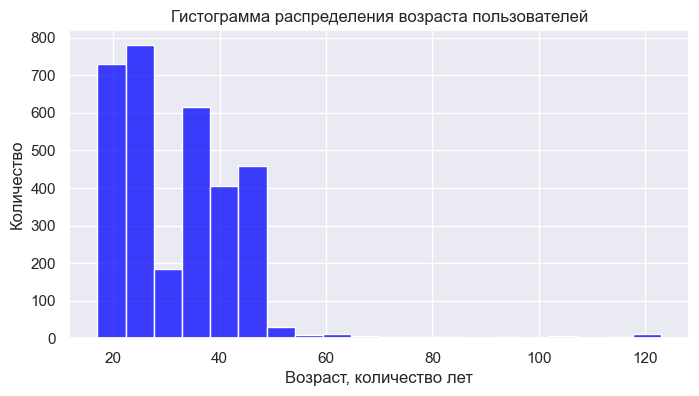

In [120]:
sns.histplot(age, bins=20, color='blue')
plt.title('Гистограмма распределения возраста пользователей')
plt.xlabel('Возраст, количество лет')
plt.ylabel('Количество')

plt.show()

In [121]:
# количество объектов, значения возраста по которым превышает 90 процентиль
len(df_copy[df_copy.age>percentile_90_value])

105

In [122]:
# посмотрим на значение 99 процентиля
age.quantile(0.99)

66.32000000000016

In [123]:
# количество объектов, значения возраста по которым превышает 99 процентиль
len(df_copy[df_copy.age>age.quantile(0.99)])

33

In [124]:
# рассмотрим объекты, значения возраста по которым превышает 99 процентиль
df_copy[df_copy.age>age.quantile(0.99)].sort_values(by='age', ascending=False)

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games
1486,737104043,123,male,нижний новгород,россия,<NA>,2022-09-03 15:33:55,25000.0,[Overwatch]
443,268162,123,male,москва,россия,83,2022-09-01 15:44:58,25000.0,[Apex Legends]
3197,742239676,123,male,город не указан,россия,<NA>,2022-09-03 20:36:55,25000.0,[Warface]
2532,747917616,123,male,город не указан,россия,0,2022-09-03 17:39:02,25000.0,[Heroes of the Storm]
2321,2041210,123,male,город не указан,россия,319,2022-09-03 10:02:36,25000.0,[Dota Underlords]
1357,738803072,123,male,город не указан,россия,6,2022-09-03 20:29:00,25000.0,[StarCraft 2]
1580,735798668,123,male,toronto,канада,9,2022-09-03 20:23:09,181530.0,[Quake Champions]
2858,744822669,120,female,город не указан,россия,0,2022-09-03 16:39:49,25000.0,"[Dota 2, CS:GO]"
3281,741607816,119,male,город не указан,россия,1,2022-09-03 20:10:31,25000.0,[CS:GO]
347,196104,119,male,санкт-петербург,россия,463,2022-09-03 19:28:17,25000.0,[CS:GO]


In [125]:
# исключим данные наблюдения из датасета
df_copy = df_copy[df_copy.age<=age.quantile(0.99)]
df_copy.shape

(3224, 9)

In [126]:
age = df_copy.age
age.describe()

count    3224.000000
mean       31.437965
std         9.764328
min        17.000000
25%        23.000000
50%        30.000000
75%        39.000000
max        65.000000
Name: age, dtype: float64

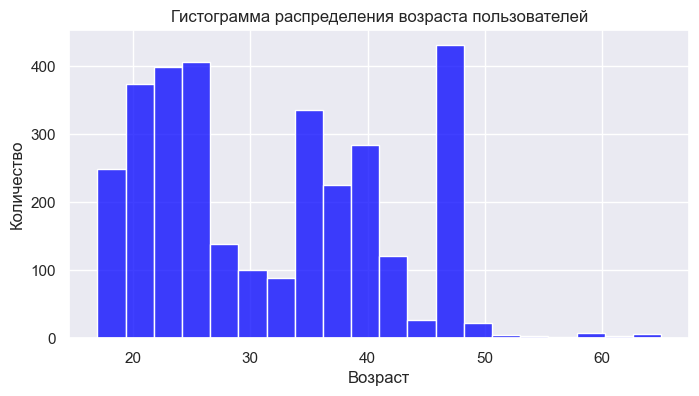

In [127]:
sns.histplot(age, bins=20, color='blue')
plt.title('Гистограмма распределения возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.savefig("age_rus.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

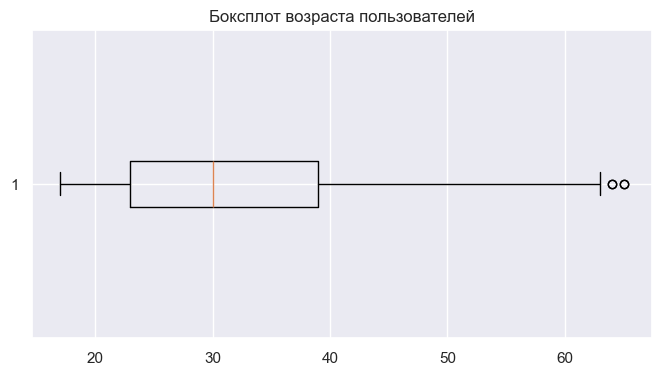

In [128]:
plt.boxplot(age, vert=False)
plt.title('Боксплот возраста пользователей')
plt.show()

In [129]:
# коэффициенты ассиметрии и эксцесса
skew = age.skew()
kurtosis = age.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 0.33372533182380587
Коэффициент эксцесса: -0.957152489307588


In [130]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(df_copy.age)

ShapiroResult(statistic=0.9288258173753037, pvalue=1.141878171736821e-36)

***Шпаргалка по выводам:***
1. О максимальных и минимальных значениях признака (оцените размах значений).
2. О нулевых значениях (их наличие, нужна ли предобработка).
3. О средних величинах (среднее, медиана, их отличия, возможные причины).
4. О процентилях (сколько процентов данных не превышают то или иное значение).
5. О результатах графического анализа (необходимость исключения выбросов, что показывает "ящик с усами", что показывает гистограмма).
6. О нормальности распределения признака (учитывая проведенные тесты).

**Выводы:**
1. Минимальное значение возраста по исходной выборке - 16 лет, максимальное - 122 года. Размах значений составил 106 лет. В процессе анализа данных было выявлено наличие выбросов - пользователей, указавших заведомо ложные значения возраста. Поскольку возраст 99% пользователей не превышает 66 лет, а количество значений за пределами 99 процентиля всего 33 человека, было принято решение об исключении этих объектов из последующего анализа. После корректировки максимальное значение возраста составило 64 года, а размах составил 48 лет.
2. После исключения некоторых выбросов среднее значение составило примерно 30 лет, а медианное - 29 лет. Значения практически равны. Небольшой сдвиг может быть причиной оставшихся аномальных значений возраста.
3. Возраст 25% пользователей не превышает 22 лет, а 75% пользователей - 38 лет, что свидетельствует о том, что большее число фанатов киберспорта - в основном, молодежь (по российским стандартам).
4. На гистограмме видно, что распределение признака отлично от нормального. В то же время возраст в диапазоне примерно после 27 лет и до 33 лет "проседает", несмотря на то, что средние значения составляют 29-30 лет. Возможно, целесообразно разделить возраст на 4 категории (например, 16-25, 26-35, 36-45, свыше 45), которые в дальнейшем проанализировать отдельно. Боксплот показывает наличие длинного "хвоста" справа и оставшихся выбросов примерно после возраста в 62 года, что также свидетельствует об отличии распределения признака от нормального.
5. Коэффициент ассиметрии больше 1, что так же свидетельствует о скошенности вправо. Коэффициент эксцесса меньше 1, что говорит о рассредоточенности значений от средних, т.е. плоской вершине и "тяжелых хвостах". По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### followers_count

In [131]:
followers_count = df_copy.followers_count.dropna()

In [132]:
followers_count.describe()

count         2416.0
mean      676.530215
std      4770.242163
min              0.0
25%              1.0
50%             16.0
75%           276.25
max         140969.0
Name: followers_count, dtype: Float64

In [133]:
percentile_10_value = followers_count.quantile(0.10)
percentile_25_value = followers_count.quantile(0.25)
percentile_50_value = followers_count.quantile(0.50)
percentile_75_value = followers_count.quantile(0.75)
percentile_90_value = followers_count.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 0.0
25-й процентиль: 1.0
50-й процентиль: 16.0
75-й процентиль: 276.25
90-й процентиль: 862.5


In [134]:
# количество объектов, подписчики по которым отсутствуют
len(df_copy[df_copy.followers_count==0])

538

In [135]:
# количество объектов, значения количества подписчиков по которым превышает 90 процентиль
len(df_copy[df_copy.followers_count>percentile_90_value])

242

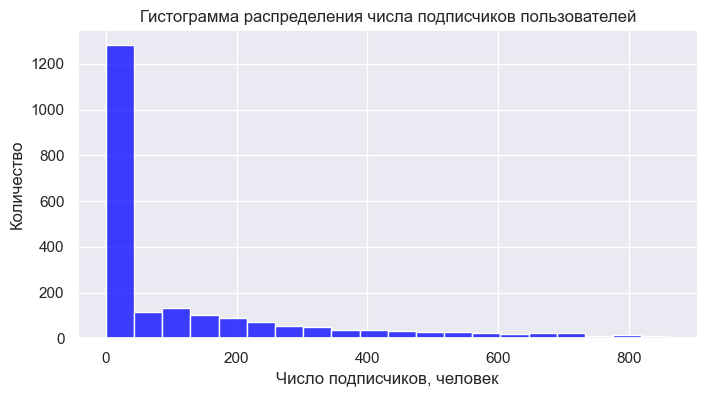

In [136]:
# построим гистограмму, ограничив 90 процентилем для наглядности
sns.histplot(followers_count[followers_count<percentile_90_value], bins=20, color='blue')
plt.title('Гистограмма распределения числа подписчиков пользователей')
plt.xlabel('Число подписчиков, человек')
plt.ylabel('Количество')
plt.show()

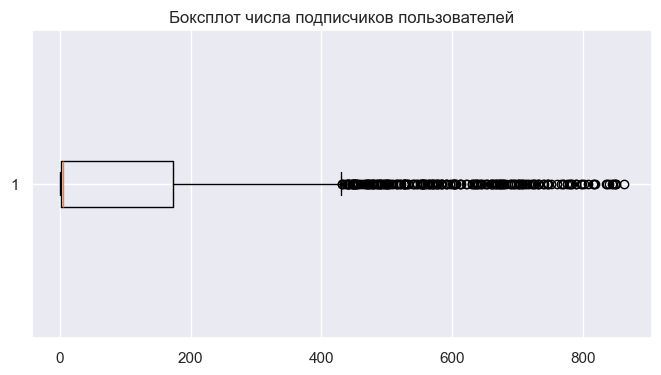

In [137]:
# построим боксплот, ограничив 90 процентилем для наглядности
plt.boxplot(followers_count[followers_count<percentile_90_value], vert=False)
plt.title('Боксплот числа подписчиков пользователей')
plt.show()

In [138]:
# коэффициенты ассиметрии и эксцесса
skew = followers_count.skew()
kurtosis = followers_count.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 19.221656380677977
Коэффициент эксцесса: 465.81943638225334


In [139]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(followers_count)

ShapiroResult(statistic=0.10272342299195347, pvalue=4.905074091481739e-75)

**Выводы:**
1. Минимальное число подписчиков - 0 (отсутствие), максимальное - 140969 человек. Рекомендуется дополнительно проанализировать пользователей с большим числом подписчиков: возможно, это лидеры мнений или блогеры, которые могут быть полезны Заказчику.
2. В выборке присутствуют незаполненные и нулевые значения подписчиков. Не заполнены значения по 808 объектам (примерно 24%: (3224-2416)/3224), возможно, по причине закрытых аккаунтов. Подписчики отсутствуют у 538 пользователей.
3. Cреднее число подписчиков пользователей составляет примерно 677 человек, а медианное - 16 человек. Такой большой сдвиг свидетельствует о скошенности распределения вправо, наличия небольшого числа пользователей с огромным количеством подписчиков, которых рекомендуется проанализировать дополнительно.
4. Число подписчиков 25% пользователей не превышает 1 человека, а 75% пользователей - 276 человек, что свидетельствует о том, что у большинства фанатов киберспорта - сравнительно немного подписчиков.
5. На гистограмме видно, что распределение признака отлично от нормального: высокий столб слева и длинный хвост справа. Боксплот также показывает наличие длинного "хвоста" справа и многочисленных выбросов примерно после уровня в 410 человек, что также свидетельствует об отличии распределения признака от нормального.
6. Коэффициент ассиметрии больше 1, что так же свидетельствует о скошенности вправо. Коэффициент эксцесса много больше 1, что говорит о большой сосредоточенности значений вокруг среднего, т.е. острой вершине. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

### costs_to_rur

In [140]:
costs_to_rur = df_copy.costs_to_rur

In [141]:
costs_to_rur.describe()

count      3224.000000
mean      30570.660670
std       23372.911216
min       19500.000000
25%       25000.000000
50%       25000.000000
75%       25000.000000
max      312100.000000
Name: costs_to_rur, dtype: float64

In [142]:
percentile_10_value = costs_to_rur.quantile(0.10)
percentile_25_value = costs_to_rur.quantile(0.25)
percentile_50_value = costs_to_rur.quantile(0.50)
percentile_75_value = costs_to_rur.quantile(0.75)
percentile_90_value = costs_to_rur.quantile(0.90)
print(f'10-й процентиль: {percentile_10_value}',
      f'25-й процентиль: {percentile_25_value}',
      f'50-й процентиль: {percentile_50_value}',
      f'75-й процентиль: {percentile_75_value}',
      f'90-й процентиль: {percentile_90_value}', sep='\n')

10-й процентиль: 25000.0
25-й процентиль: 25000.0
50-й процентиль: 25000.0
75-й процентиль: 25000.0
90-й процентиль: 25000.0


In [143]:
# количество объектов, значения затрат по которым превышает 90 процентиль
len(costs_to_rur[costs_to_rur>costs_to_rur.quantile(0.90)])

269

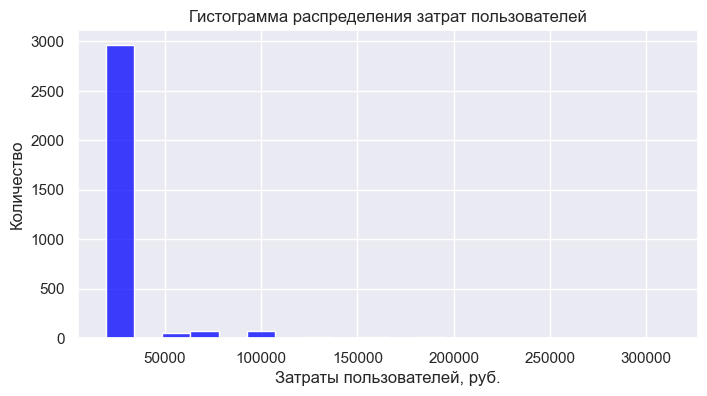

In [144]:
sns.histplot(costs_to_rur, bins=20, color='blue')
plt.title('Гистограмма распределения затрат пользователей')
plt.xlabel('Затраты пользователей, руб.')
plt.ylabel('Количество')
plt.show()

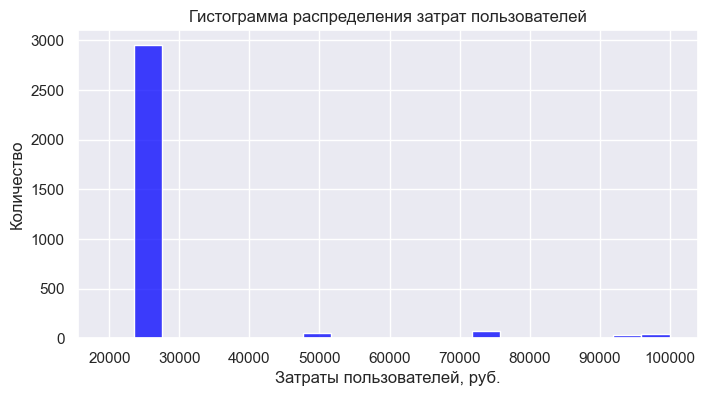

In [145]:
# построим гистограмму, ограничив 99 процентилем для наглядности
sns.histplot(costs_to_rur[costs_to_rur<costs_to_rur.quantile(0.99)], bins=20, color='blue')
plt.title('Гистограмма распределения затрат пользователей')
plt.xlabel('Затраты пользователей, руб.')
plt.ylabel('Количество')
plt.show()

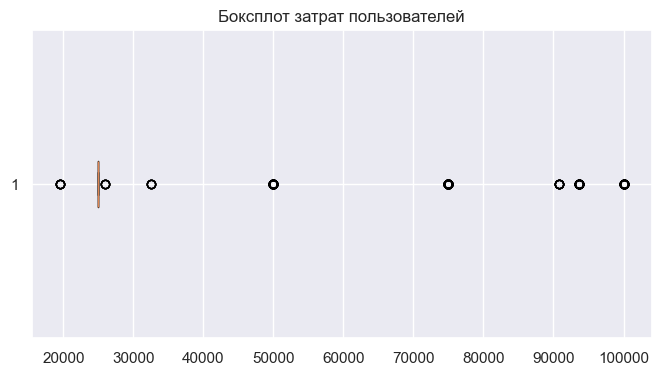

In [146]:
# построим боксплот, ограничив 99 процентилем для наглядности
plt.boxplot(costs_to_rur[costs_to_rur<costs_to_rur.quantile(0.99)], vert=False)
plt.title('Боксплот затрат пользователей')
plt.show()

In [147]:
# коэффициенты ассиметрии и эксцесса
skew = costs_to_rur.skew()
kurtosis = costs_to_rur.kurtosis()
print(f'Коэффициент ассиметрии: {skew}', f'Коэффициент эксцесса: {kurtosis}', sep='\n')

Коэффициент ассиметрии: 6.380063343230032
Коэффициент эксцесса: 55.369478910708494


In [148]:
# тест на нормальность распределения
# Гипотеза Н0: наблюдаемая выборка принадлежит нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемая выборка не принадлежит нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
# Проверим признаки на нормальность при помощи критерия Шапиро-Уилка:
stats.shapiro(costs_to_rur)

ShapiroResult(statistic=0.2571469382430478, pvalue=5.149113687922924e-78)

**Выводы:**
1. Минимальная сумма затрат пользователей - 19500 руб., максимальная - 312100 руб. Размах значений составил 292600 руб. Рекомендуется дополнительно проанализировать пользователей с большими затратами. Возможно, удастся выявить причины, влияющие лояльность пользователей и на объем их затрат в онлайн-магазине.
2. Cредняя сумма затрат пользователей составляет примерно 30571 руб., а медианная - 25000 руб. Сдвиг незначительный, но свидетельствует о скошенности распределения вправо, наличия небольшого числа пользователей с большими затратами, которых рекомендуется проанализировать дополнительно.
3. Процентили с 10-го по 90-й равны и составляют 25000 руб. Рекомендуется дополнительно обратиться к Заказчику с уточнением корректности представленных данных. Либо сумма затрат могла быть связана с единоразовыми покупками одних и тех же товаров, например, в период распродажи или акций (также стоит уточнить у Заказчика).
4. На гистограмме видно, что распределение признака отлично от нормального: высокий столб слева на уровне 25000 руб. и отдельные столбики справа. Боксплот также показывает равенство процентилей и многочисленные выбросы справа, что свидетельствует об отличии распределения признака от нормального, а также впринципе о странности данного распределения.
5. Коэффициент ассиметрии больше 1, что так же свидетельствует о скошенности вправо. Коэффициент эксцесса много больше 1, что говорит о большой сосредоточенности значений вокруг среднего, т.е. острой вершине. По проведенному тесту на нормальность распределения p-value меньше уровня значимости 0,05, поэтому гипотеза о нормальности распределения признака отвергается. Соответственно в дальнейшем при анализе взаимосвязи признаков следует применять непараметрические критерии сравнения групп: для 2х независимых групп - критерий Манна-Уитни, для более 2х независимых групп - критерий Краскала-Уоллиса.

## Категориальные признаки

In [149]:
df_copy.select_dtypes(include=[object]).columns

Index(['gender', 'city', 'country', 'games'], dtype='object')

### gender

In [150]:
gender = df_copy.gender
gender.describe()

count     3224
unique       2
top       male
freq      2793
Name: gender, dtype: object

In [151]:
gender.mode()

0    male
Name: gender, dtype: object

In [152]:
gender.value_counts()

gender
male      2793
female     431
Name: count, dtype: int64

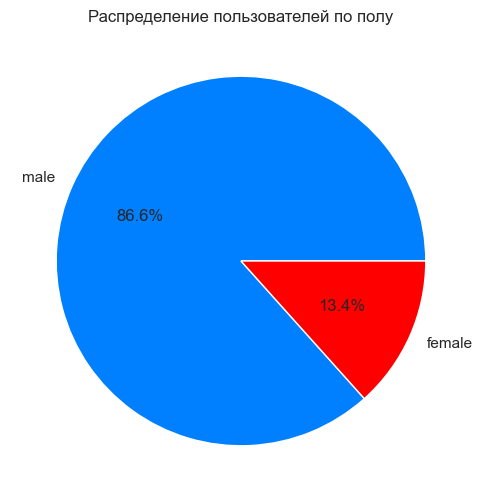

In [153]:
# Цвета для категорий (например, синий для 'male' и красный для 'female')
colors=[(0, 0.5, 1), (1, 0, 0)]

# Строим диаграмму
plt.figure(figsize=(8, 6))
plt.pie(
    gender.value_counts(),
    labels=gender.value_counts().index,
    autopct='%.1f%%',
    colors=colors  # Указываем цвета
)
plt.title('Распределение пользователей по полу')
plt.show()

***Шпаргалка по выводам:***
1.   О количестве уникальных значений признака.
2.   О наиболее часто встречаемом значении признака (что за значение, сколько раз встретилось).
3.   О распределении значений признака (наиболее встречаемые, наименее встречаемые).
4.   О результатах графического анализа определенного топ признака (что показывает столбчатая и круговая диаграммы).

**Выводы:**
1. В датасете по признаку пол указаны значения у всех пользователей: male или female.
2. Большая часть фанатов киберспорта - мужчины (86,6%).

### city

In [154]:
city = df_copy.city
city.describe()

count                3224
unique                279
top       город не указан
freq                 1487
Name: city, dtype: object

In [155]:
city.mode()

0    город не указан
Name: city, dtype: object

In [156]:
city.value_counts()

city
город не указан    1487
санкт-петербург     641
москва              425
екатеринбург         19
новосибирск          18
                   ... 
вязьма                1
алейск                1
черкесск              1
бабаево               1
норильск              1
Name: count, Length: 279, dtype: int64

In [157]:
city.value_counts()[:5]

city
город не указан    1487
санкт-петербург     641
москва              425
екатеринбург         19
новосибирск          18
Name: count, dtype: int64

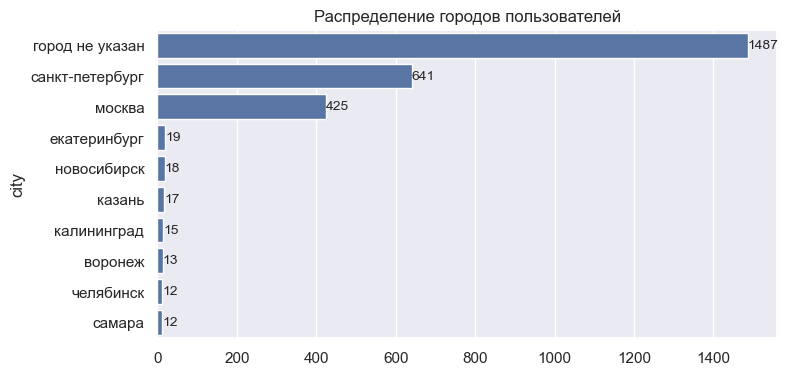

In [158]:
ax = sns.barplot(y=city.value_counts().index[:10], x=city.value_counts().values[:10])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение городов пользователей')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку город проживания составляет 279.
2. У почти половины пользователей город не указан (примерно 46%).
3. Среди пользователей, указавших город проживания, большинство проживают в Санкт-Петербурге (641 чел.), на втором месте - Москва (425 чел.). В остальных городах проживает сравнительно меньше пользователей онлайн-магазина.
4. В топ-5 также входят города-миллионники Екатеринбург и Новосибирск.
5. Далее есть смысл анализировать взаимосвязи с признаком "Город проживания" только для выборок по Москве и Санкт-Петербургу.

### country

In [159]:
country = df_copy.country
country.describe()

count       3224
unique        38
top       россия
freq        3076
Name: country, dtype: object

In [160]:
country.mode()

0    россия
Name: country, dtype: object

In [161]:
country.value_counts()

country
россия                           3076
сша                                25
украина                            23
казахстан                          16
беларусь                           16
германия                           11
швеция                              7
израиль                             5
великобритания                      5
чехия                               3
узбекистан                          3
испания                             2
польша                              2
албания                             2
кыргызстан                          2
сербия                              2
кипр                                2
нидерланды                          2
объединенные арабские эмираты       1
пакистан                            1
литва                               1
джерси                              1
ботсвана                            1
антигуа и барбуда                   1
бразилия                            1
колумбия                            1
эсто

In [162]:
country.value_counts()[:5]

country
россия       3076
сша            25
украина        23
казахстан      16
беларусь       16
Name: count, dtype: int64

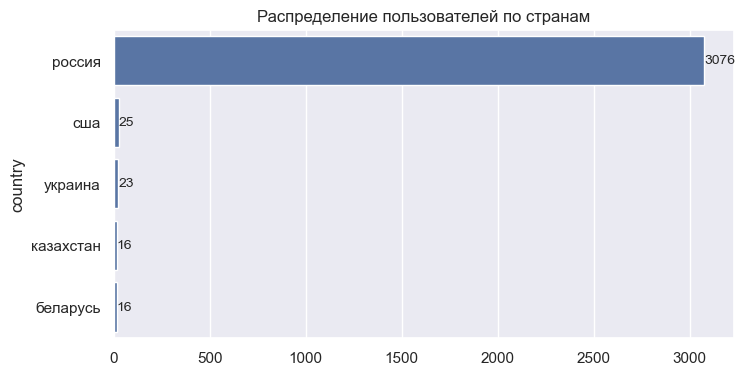

In [163]:
ax = sns.barplot(y=country.value_counts().index[:5], x=country.value_counts().values[:5])
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение пользователей по странам')
plt.show()

**Выводы:**
1. Количество уникальных значений по признаку страна проживания составляет 38.
2. 95% пользователей проживают в России.
3. В топ-5 также входят США, Украина, Казахстан и Беларусь.
4. Далее анализировать взаимосвязи с признаком "Страна проживания" не имеет смысла.

In [164]:
import ast

def safe_eval(x):
    try:
        # Если значение — строка, пробуем преобразовать через ast.literal_eval
        if isinstance(x, str):
            return ast.literal_eval(x)
        # Если это уже список/словарь — возвращаем как есть
        elif isinstance(x, (list, tuple, dict)):
            return x
        else:
            return []  # или None, в зависимости от вашей логики
    except Exception:
        return []

# Применяем безопасную версию
df_copy['games'] = df_copy['games'].apply(safe_eval)

# Теперь можно взорвать по играм
df_games = df_copy.explode('games', ignore_index=True)

# Сохраняем
df_games.to_csv('df_games_v2.csv', index=False)
df_copy.to_excel('shop_users_clean_v2.xlsx', index=False)

print("Файлы успешно сохранены!")

Файлы успешно сохранены!


### games

In [165]:
games = df_games.games
games.describe()

count            4442
unique             17
top       StarCraft 2
freq              412
Name: games, dtype: object

In [166]:
games.mode()

0    StarCraft 2
Name: games, dtype: object

In [167]:
games.value_counts()

games
StarCraft 2            412
Warface                345
League of Legends      333
Dota 2                 327
CS:GO                  312
Warcraft III           287
Free Fire              279
Dota Underlords        262
PUBG                   262
Heroes of the Storm    251
Apex Legends           247
Overwatch              233
Quake Champions        227
Hearthstone            224
Valorant               197
FIFA                   133
Fortnite               111
Name: count, dtype: int64

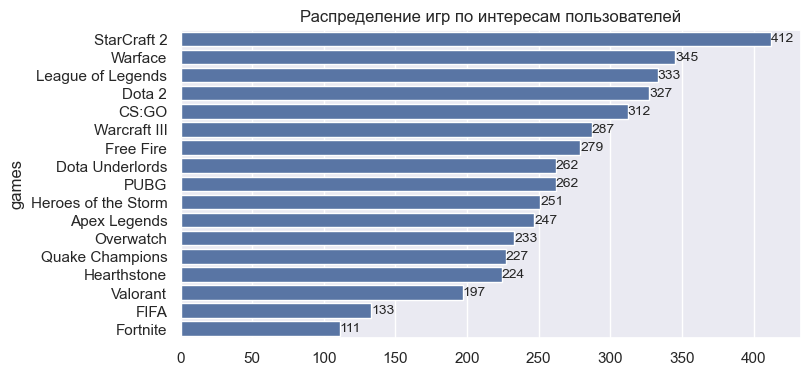

In [168]:
ax = sns.barplot(y=games.value_counts().index, x=games.value_counts().values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение игр по интересам пользователей')
plt.show()

**Выводы:**
1. Количество уникальных игр, которыми интересуются пользователи, составляет 17.
2. Наиболее популярной игрой является StarCraft 2, ей интересуются 412 пользователей.
3. В топ-5 также входят Warface, League of Legends, Dota 2 и CS:GO.
4. Наименее популярными являются Fortnite и FIFA, ими интересуется всего 111 и 133 человека соответственно.

## Взаимосвязь количественных признаков

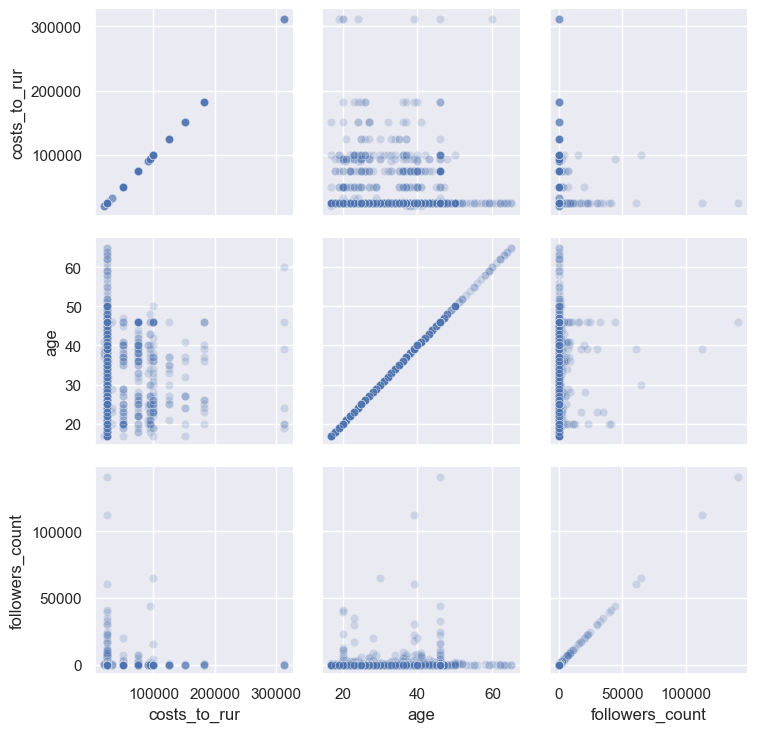

In [169]:
g = sns.PairGrid(df_copy[['costs_to_rur', 'age', 'followers_count']])
g.map(sns.scatterplot, alpha=0.2)
plt.show()

### costs_to_rur - age

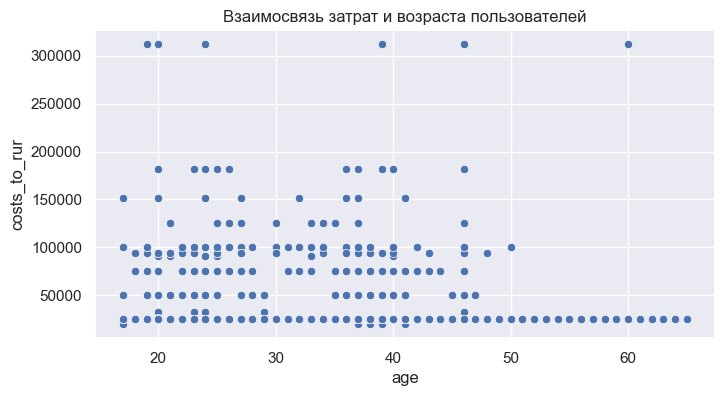

In [170]:
sns.scatterplot(data=df_copy, x='age', y='costs_to_rur')
plt.title('Взаимосвязь затрат и возраста пользователей')
plt.show()

In [171]:
df_copy[['costs_to_rur', 'age']].corr(method = 'spearman')

,costs_to_rur,age
costs_to_rur,1.000000,0.021231
age,0.021231,1.000000


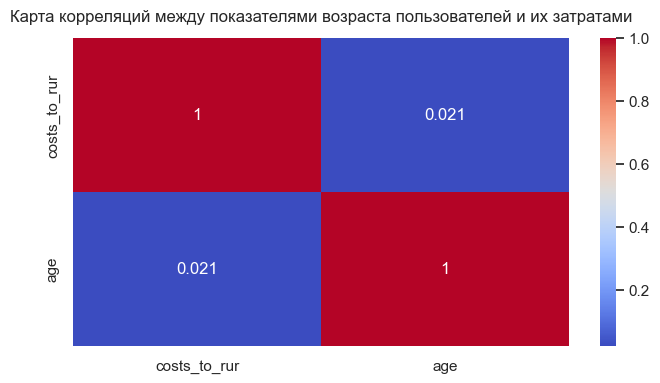

In [172]:
hm = sns.heatmap(df_copy[['costs_to_rur', 'age']].corr(method = 'spearman'),annot=True, cmap= 'coolwarm')
hm.set_title('Карта корреляций между показателями возраста пользователей и их затратами', fontdict={'fontsize':12}, pad=12)
plt.savefig("heat_age_spend.png", format = "png", dpi=500, bbox_inches='tight')
plt.savefig("heatmap_rus.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

In [173]:
# Гипотеза Н0: корреляция статистически незначима и связи между признаками нет.
# Гипотеза Н1: корреляция статистически значима и есть связь между признаками.
scipy.stats.spearmanr(df_copy['costs_to_rur'], df_copy['age'])

SignificanceResult(statistic=0.02123125731707805, pvalue=0.22813187197824258)

In [174]:
# p-value больше уровня значимости 0,05.
# Принимаем H0 о том,что связь между признаками статистически не значима.

***Шпаргалка по выводам:***
1. О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, какая взаимосвязь (линейная, нелинейная)).
2. О степени (по шкале Чеддока) и значимости взаимосвязи.

**Выводы:**
1. По общей диаграмме рассеяния заметно, что сумма затрат не зависит от количества подписчиков пользователей.
2. Рассматривать зависимость возраста пользователей и количества подписчиков нецелесообразно в рамках текущего кейса.
3. Линейной связи между возрастом и затратами пользователей не обнаружена, о чем свидетельствует значение коэффициента кореляции Спирмена, а также результаты теста Спирмена на взаимосвязь признаков (p-value больше уровня значимости 0,05).
4. Рекомендуется рассмотреть распределение признаков с учетом половой принадлежности.

### costs_to_rur - age - gender

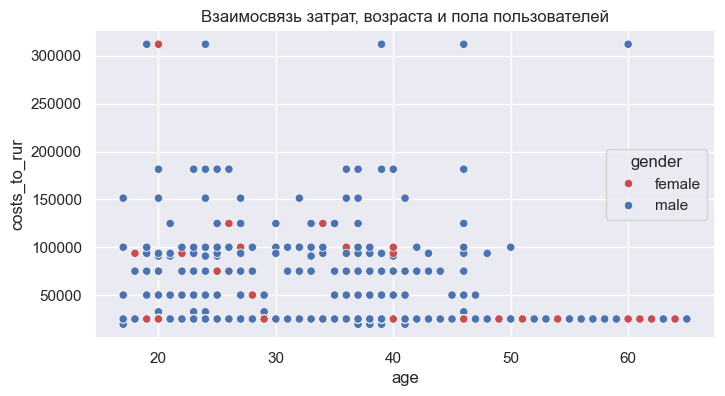

In [175]:
sns.scatterplot(data=df_copy, x='age', y='costs_to_rur', hue='gender', palette=['r', 'b'])
plt.title('Взаимосвязь затрат, возраста и пола пользователей')
plt.show()

**Выводы:**
1. По диаграмме рассеяния с учетом введения полового признака линейной связи не прослеживается.
2. Рекомендуется рассмотреть возраст не как количественный признак, а как категориальный, объединив значения в категории, например, 16-25, 25-35, 35-45, свыше 45 (по итогу анализа гистограммы в одном из разделов выше).

## Взаимосвязь количественных и категориальных признаков

### age - gender

In [176]:
df_copy.groupby('gender')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,431.0,32.853828,10.998921,17.0,23.0,31.0,45.0,65.0
male,2793.0,31.219477,9.543117,17.0,23.0,30.0,39.0,65.0


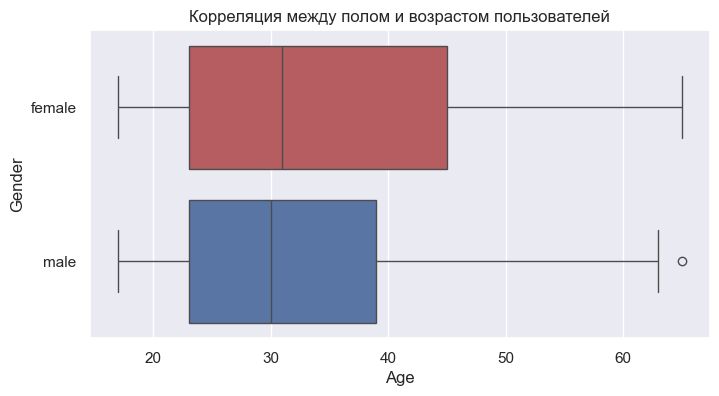

In [177]:
sns.boxplot(
    y='gender',
    x='age',
    data=df_copy,
    hue='gender',           # добавляем hue
    palette=['r', 'b'],     # ваша палитра
    legend=False            # отключаем легенду
)
plt.title('Корреляция между полом и возрастом пользователей')
plt.xlabel('Age')
plt.ylabel('Gender')
plt.show()

In [178]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('male', stats.shapiro(df_copy[df_copy['gender']=='male']['age']))
print('female', stats.shapiro(df_copy[df_copy['gender']=='female']['age']))

male ShapiroResult(statistic=0.9300171162345379, pvalue=2.697597518923693e-34)
female ShapiroResult(statistic=0.914329287063147, pvalue=6.4798439167795425e-15)


In [179]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [180]:
# Проверим связь пола и возраста с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['gender']=='male']['age'],df_copy[df_copy['gender']=='female']['age'])

MannwhitneyuResult(statistic=552652.5, pvalue=0.006078761699124564)

In [181]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, возраст пользователей, увлекающихся киберспортом,
# отличается в зависимости от половой принадлежности.

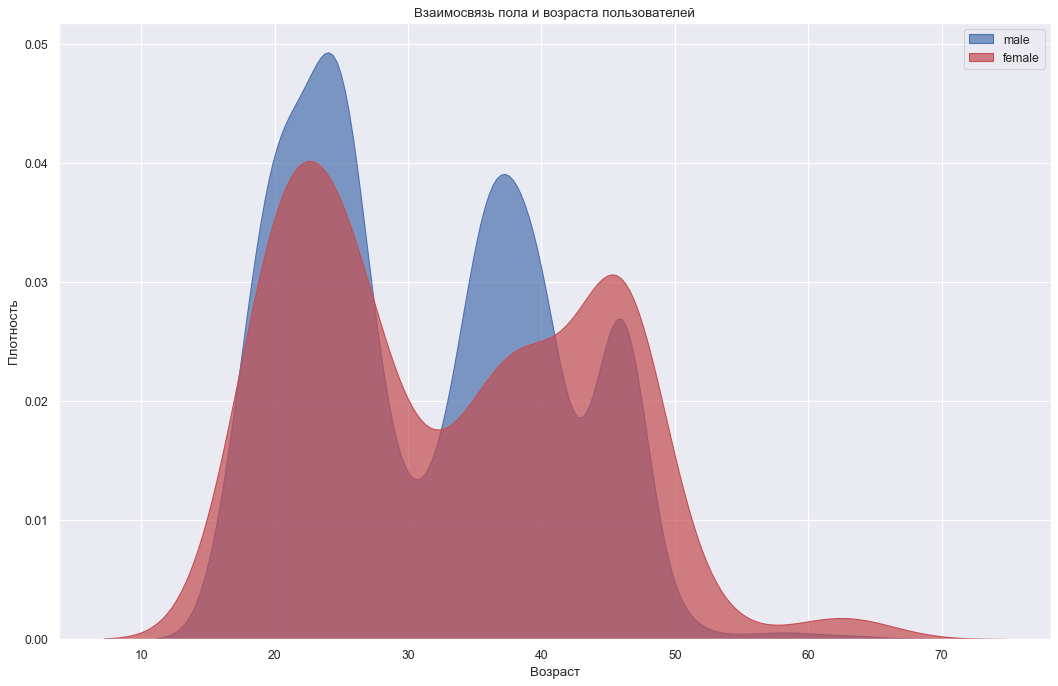

In [182]:
# построим графики плотности распределения возраста в зависимости от пола
plt.figure(figsize=(16, 10), dpi=80)

# Для мужчин
sns.kdeplot(
    df_copy.loc[df_copy['gender'] == 'male', "age"],
    fill=True,           
    color="b",
    label='male',
    alpha=.7
)

# Для женщин
sns.kdeplot(
    df_copy.loc[df_copy['gender'] == 'female', "age"],
    fill=True,           
    color="r",
    label='female',
    alpha=.7
)

# Оформление графика
plt.title('Взаимосвязь пола и возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.legend()
plt.show()

***Шпаргалка по выводам:***
1. О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2. Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака), в т.ч. о нормальности распределения на основании теста Шапиро_Уилка.
3. О средних величинах (как распределена медиана).
4. О значимости взаимосвязи признаков.

**Выводы:**
1. Количество мужчин намного больше, чем женщин. По боксплотам взаимосвязь между признаками неочевидна, т.к. распределения похожи, а медианы расположены близко.
2. Однако на графиках плотностей заметно, что распределения возраста различаются в зависимости от пола пользователей, но оба распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение возраста мужчин составляет 29 лет, а женщин 30 лет.
4. Несмотря на небольшую разницу в медианах взаимосвязь пола и возраста пользователей является статистически значимой, т.е. возраст пользователей, увлекающихся киберспортом, отличается в зависимости от половой принадлежности.
5. Рекомендуется рассмотреть возраст, объединив значения в категории.

### age - city - gender

In [183]:
# выборка для городов, где проживает максимальное число пользователей из указавших город проживания
city = ['санкт-петербург', 'москва']
len(df_copy[df_copy.city.isin(city)])

1066

In [184]:
df_copy[df_copy.city.isin(city)].groupby('city')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
москва,425.0,35.287059,9.138476,17.0,27.0,37.0,42.0,60.0
санкт-петербург,641.0,36.425897,8.475768,17.0,33.0,37.0,44.0,62.0


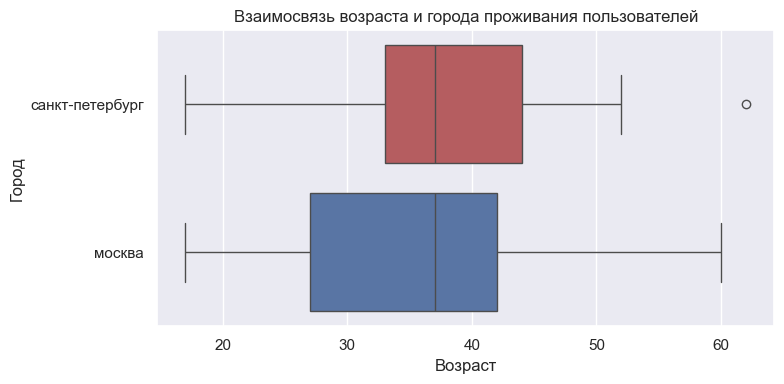

In [185]:
sns.boxplot(
    y='city',
    x='age',
    data=df_copy[df_copy.city.isin(city)],
    hue='city',             
    palette=['r', 'b'],     
    legend=False           
)

# Оформление графика
plt.title('Взаимосвязь возраста и города проживания пользователей')
plt.xlabel('Возраст')
plt.ylabel('Город')
plt.tight_layout()
plt.show()

In [186]:
df_copy[df_copy.city.isin(city)].groupby(['city', 'gender'])['age'].describe()

count       mean        std   min   25%   50%   75%  \
city            gender                                                        
москва          female   72.0  37.916667   9.869215  20.0  31.5  40.0  46.0   
                male    353.0  34.750708   8.901938  17.0  26.0  36.0  41.0   
санкт-петербург female   91.0  36.406593  10.240419  19.0  28.0  37.0  46.0   
                male    550.0  36.429091   8.158129  17.0  34.0  37.0  42.0   

                         max  
city            gender        
москва          female  60.0  
                male    52.0  
санкт-петербург female  62.0  
                male    50.0

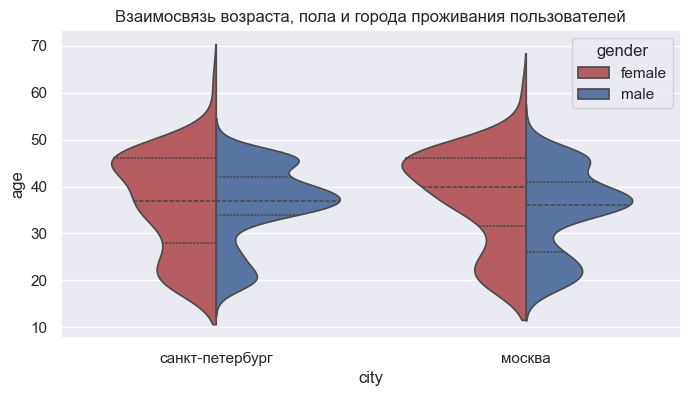

In [187]:
# скрипичная диаграмма
sns.violinplot(data=df_copy[df_copy.city.isin(city)], x='city', y='age',
               hue='gender', split=True, inner="quart", palette=['r', 'b'])
plt.title('Взаимосвязь возраста, пола и города проживания пользователей')
plt.show()

In [188]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('санкт-петербург', stats.shapiro(df_copy[df_copy['city']=='санкт-петербург']['age']))
print('москва', stats.shapiro(df_copy[df_copy['city']=='москва']['age']))

санкт-петербург ShapiroResult(statistic=0.9076840436788665, pvalue=2.901286649301429e-19)
москва ShapiroResult(statistic=0.9165130475885293, pvalue=1.3743254755337924e-14)


In [189]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [190]:
# Проверим связь возраста и города проживания с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['city']=='санкт-петербург']['age'],
                         df_copy[df_copy['city']=='москва']['age'])

MannwhitneyuResult(statistic=144681.0, pvalue=0.08320492562897494)

In [191]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Статистически значимые отличия в группах отсутствуют.
# Соответственно, в целом возраст пользователей, увлекающихся киберспортом,
# не отличается в зависимости от проживания в Москве или Санкт-Петербурге.

**Выводы:**
1. В выборку по городам проживания Москва и Санкт-Петербург попало 1066 пользователей. По боксплотам и скрипичным диаграммам взаимосвязь между признаками неочевидна, т.к. распределения похожи, а медианы расположены близко.
2. Оба распределения пользователей по городам не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианные значения возраста пользователей в целом по Москве и Санкт-Петербургу совпадают и составляют 36 лет. Однако отмечено, что возраст женщин, проживающих в Москве, в среднем выше, чем возраст женщин, проживающих в Санкт-Петербурге, а также мужчин, проживающих в обоих городах, и составляет 39 лет по сравнению с 35-36 годами по другим категориям.
4. Взаимосвязь возраста и города проживания пользователей не является статистически значимой, в целом возраст пользователей, увлекающихся киберспортом, не отличается в зависимости от проживания в Москве или Санкт-Петербурге.

### games - age

In [192]:
df_games.groupby('games')['age'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
games,,,,,,,,
StarCraft 2,412.0,30.339806,9.833953,17.0,22.0,27.0,39.0,63.0
Warface,345.0,30.313043,9.165182,17.0,23.0,27.0,38.0,59.0
League of Legends,333.0,32.000000,9.808406,17.0,23.0,33.0,39.0,64.0
Dota 2,327.0,31.987768,9.815468,17.0,23.0,33.0,40.0,57.0
CS:GO,312.0,31.368590,9.577676,17.0,23.0,29.5,39.0,54.0
Warcraft III,287.0,30.080139,9.922630,17.0,22.0,26.0,38.0,63.0
Free Fire,279.0,31.275986,9.618954,17.0,23.0,30.0,40.0,52.0
Dota Underlords,262.0,31.408397,10.150836,17.0,23.0,28.0,40.0,62.0
PUBG,262.0,32.354962,9.830749,17.0,23.0,34.0,40.0,62.0


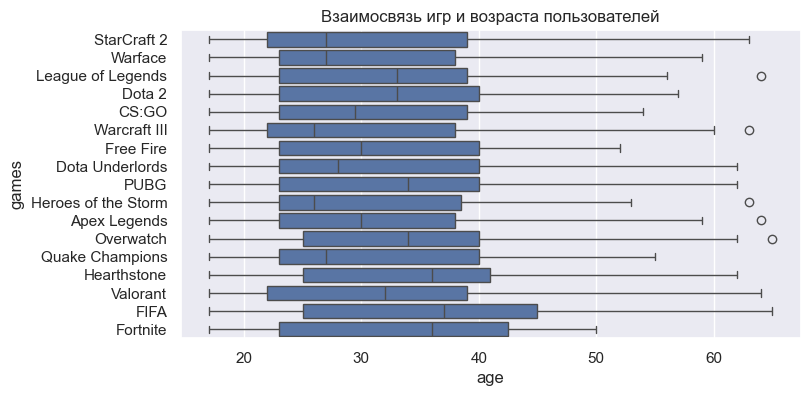

In [193]:
# с учетом сортировки игр по убыванию количества пользователей
sns.boxplot(y='games', x='age', data=df_games,
            order=df_games.groupby('games')['age'].describe().sort_values(by='count', ascending=False).index)
plt.title('Взаимосвязь игр и возраста пользователей')
plt.show()

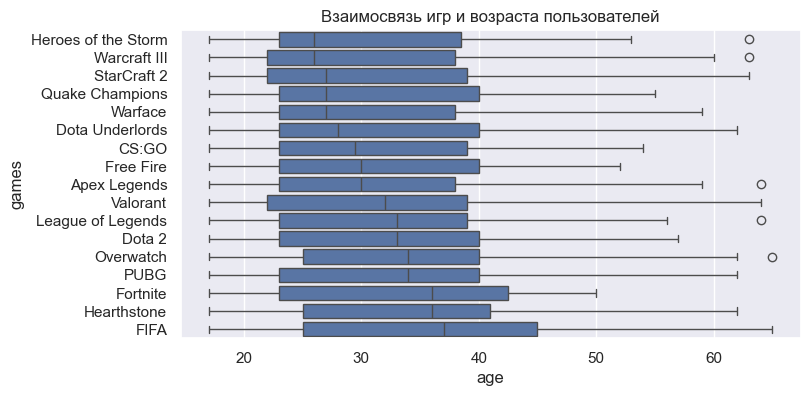

In [194]:
# с учетом сортировки игр по возрастанию медианного возраста пользователей
sns.boxplot(y='games', x='age', data=df_games,
            order=df_games.groupby('games')['age'].describe().sort_values(by='50%').index)
plt.title('Взаимосвязь игр и возраста пользователей')
plt.savefig("game_age_rus.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

In [195]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
for game in df_games.games.unique():
    # печать только p-value
    print(game, stats.shapiro(df_games[df_games.games==game]['age'])[1])

Dota 2 1.263708035499028e-12
CS:GO 3.3499465920657635e-12
Warcraft III 5.016138096025981e-12
League of Legends 2.105718066170438e-11
Valorant 1.4597211932879795e-08
Apex Legends 1.752666788606111e-09
Fortnite 2.681785318928817e-07
StarCraft 2 7.995146593631025e-14
Warface 2.135460592280515e-12
Free Fire 8.500767272199586e-11
Dota Underlords 3.639069132479185e-11
Quake Champions 7.15381232316919e-10
Heroes of the Storm 1.1477388314987161e-10
PUBG 2.8959015694629824e-09
Hearthstone 2.781789681332608e-08
Overwatch 3.3506725531662807e-08
FIFA 1.4264998166941596e-06


In [196]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Краскела_Уоллиса.

In [197]:
# Проверим связь возраста и города проживания с помощью критерия Краскела_Уоллиса.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.

# соберем все выборки в общий список
data_array = list()
for game in df_games.games.unique():
    data_array.append(df_games[df_games.games==game]['age'].to_list())

stats.mstats.kruskalwallis(*data_array)

KruskalResult(statistic=61.103073247982344, pvalue=3.408085713749953e-07)

In [198]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Принимается гипотеза H1.
# Отличия в группах являются статистически значимыми.
# Соответственно, одними играми интересуются более молодые пользователями, другими - более зрелые.

**Выводы:**
1. По боксплотам взаимосвязь между признаками неочевидна, т.к. групп достаточно много. Распределения рядом стоящих похожи, их медианы расположены близко, а крайние распределения отличаются друг от друга.
2. Распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианные значения возраста пользователей в зависимости от игр, которыми они интересуются, совпадают по некоторым группам игр, но в целом отличаются и составляют от 25 до 36 лет.
4. Взаимосвязь возраста и игр пользователей является статистически значимой, т.е. одними играми интересуются более молодые пользователями, другими - более зрелые.
5. Поскольку построение взаимосвязи с учетом пола дает очень нагруженные графики, а их количество велико для визуального анализа, рассматривать их нецелесообразно.
6. Рекомендуется рассмотреть возможность объединения игр в группы, например, по жанрам или производителю и дополнительно провести анализ в группах.
7. Анализ взаимосвязи игр с затратами пользователей не имеет смысла, т.к. нет данных о затратах в разрезе игр (такой анализ был бы полезен, поскольку можно было бы выявить наиболее прибыльные сегменты).

### costs_to_rur - gender

In [199]:
df_copy.groupby('gender')['costs_to_rur'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,431.0,29150.464037,20953.656641,25000.0,25000.0,25000.0,25000.0,312100.0
male,2793.0,30789.817401,23720.139213,19500.0,25000.0,25000.0,25000.0,312100.0


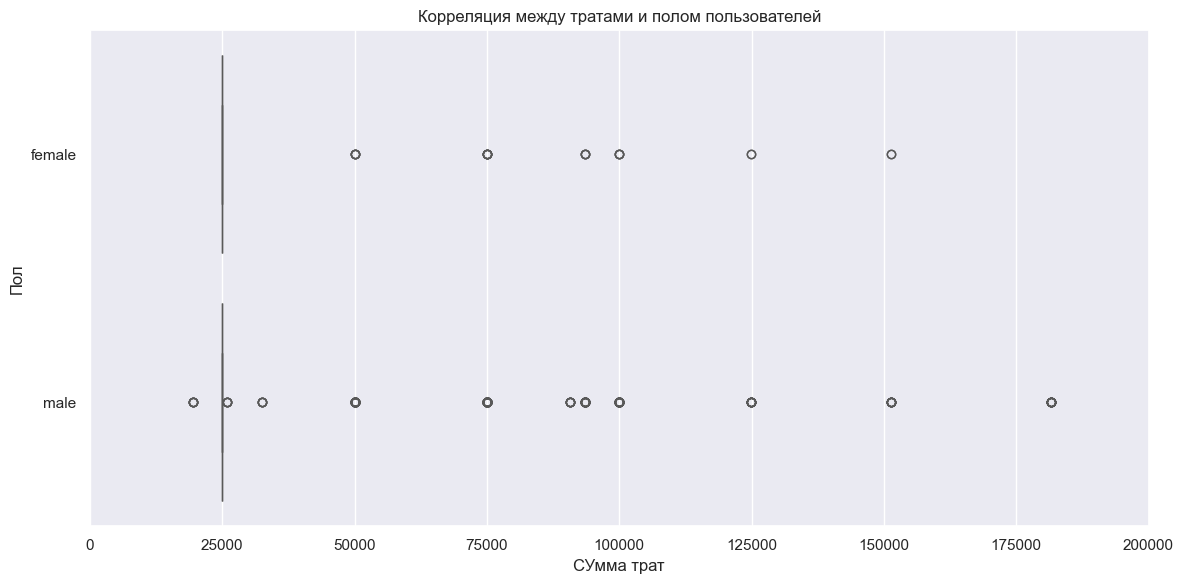

In [200]:
plt.figure(figsize=(12, 6))
ax = sns.boxplot(
    y='gender',
    x='costs_to_rur',
    data=df_copy,
    hue='gender',           # добавляем hue
    palette='Set2',         # ваша палитра
    legend=False 
)
ax.set_xlim(0, 200000)
# Добавляем подписи на медиану
medians = df_copy.groupby('gender')['costs_to_rur'].median().values
for median, patch in zip(medians, ax.artists):
    x = patch.get_x() + patch.get_width() / 2
    y = median
    ax.text(x, y, f'{y:.0f}', ha='center', va='center', color='black')

# Оформление графика
plt.title('Корреляция между тратами и полом пользователей')
plt.xlabel('СУмма трат')
plt.ylabel('Пол')
plt.tight_layout()
plt.show()

In [201]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('male', stats.shapiro(df_copy[df_copy['gender']=='male']['costs_to_rur']))
print('female', stats.shapiro(df_copy[df_copy['gender']=='female']['costs_to_rur']))

male ShapiroResult(statistic=0.26530244633256095, pvalue=2.251204736440725e-74)
female ShapiroResult(statistic=0.20123353789625376, pvalue=3.7766817965422564e-39)


In [202]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [203]:
# Проверим связь пола и затрат пользователей с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['gender']=='male']['costs_to_rur'],
                         df_copy[df_copy['gender']=='female']['costs_to_rur'])

MannwhitneyuResult(statistic=618117.0, pvalue=0.06258361423874798)

In [204]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Статистически значимые отличия в группах отсутствуют.
# Соответственно, сумма затрат пользователей онлайн-магазина не зависит от половой принадлежности.

**Выводы:**
1. Количество мужчин намного больше, чем женщин. По боксплотам взаимосвязь между признаками неочевидна, т.к. распределения похожи, медианы совпадают, а сами "ящики с усами" не отрисовываются (о возможных причинах было описано в выводах в одном из предыдущих разделов).
2. Оба распределения не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианное значение затрат у мужчин и у женщин совпадает и составляет 25000 руб.
4. Взаимосвязь пола и затрат пользователей не является статистически значимой, т.е. сумма затрат пользователей онлайн-магазина не зависит от половой принадлежности.
5. Рекомендуется дополнительно обратиться к Заказчику с уточнением корректности представленных данных, а также информации о проведенных акционных мероприятиях в онлайн-магазине, которые могли стать причиной нестандартного распределения признака.

### costs_to_rur - city - gender

In [205]:
# выборка для городов, где проживает максимальное число пользователей из указавших город проживания
city = ['санкт-петербург', 'москва']
len(df_copy[df_copy.city.isin(city)])

1066

In [206]:
df_copy[df_copy.city.isin(city)].groupby('city')['costs_to_rur'].describe()

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
москва,425.0,27529.411765,11811.798782,25000.0,25000.0,25000.0,25000.0,100000.0
санкт-петербург,641.0,28471.138846,13572.819580,25000.0,25000.0,25000.0,25000.0,100000.0


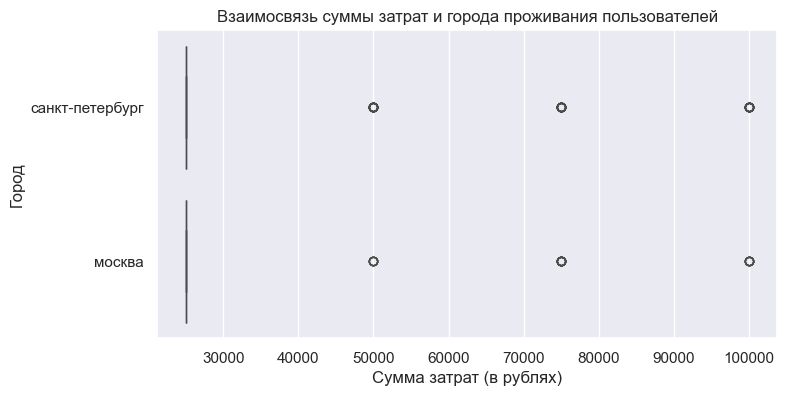

In [207]:
sns.boxplot(
    y='city', 
    x='costs_to_rur', 
    data=df_copy[df_copy.city.isin(city)], 
    hue='city',               # добавляем hue
    palette=['r', 'b'],       # ваша палитра
    legend=False              # убираем лишнюю легенду
)
plt.title('Взаимосвязь суммы затрат и города проживания пользователей')
plt.xlabel('Сумма затрат (в рублях)')
plt.ylabel('Город')
plt.show()

In [208]:
df_copy[df_copy.city.isin(city)].groupby(['city', 'gender'])['costs_to_rur'].describe()

count          mean           std      min      25%  \
city            gender                                                        
москва          female   72.0  25347.222222   2946.278255  25000.0  25000.0   
                male    353.0  27974.504249  12850.403529  25000.0  25000.0   
санкт-петербург female   91.0  28571.428571  15170.983164  25000.0  25000.0   
                male    550.0  28454.545455  13305.049484  25000.0  25000.0   

                            50%      75%       max  
city            gender                              
москва          female  25000.0  25000.0   50000.0  
                male    25000.0  25000.0  100000.0  
санкт-петербург female  25000.0  25000.0  100000.0  
                male    25000.0  25000.0  100000.0

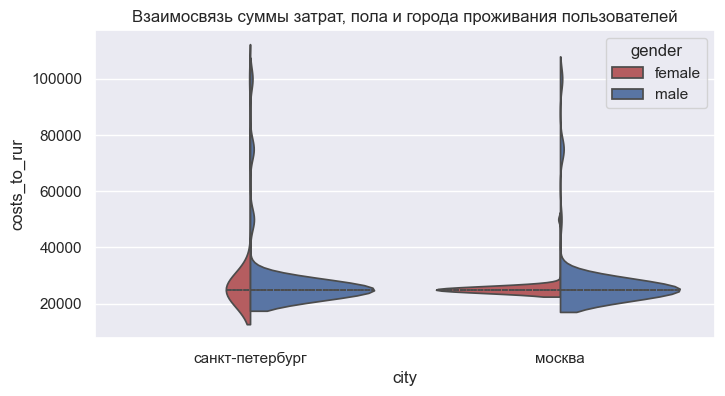

In [209]:
# скрипичная диаграмма
sns.violinplot(data=df_copy[df_copy.city.isin(city)], x='city', y='costs_to_rur',
               hue='gender', split=True, inner="quart", palette=['r', 'b'])
plt.title('Взаимосвязь суммы затрат, пола и города проживания пользователей')
plt.show()

In [210]:
# Проверим выборки на нормальность при помощи критерия Шапиро-Уилка.
# Гипотеза Н0: наблюдаемые выборки принадлежат нормальной генеральной совокупности.
# Гипотеза Н1: наблюдаемые выборки не принадлежат нормальной генеральной совокупности.
# Уровень значимости полагаем равным 0,05.
print('санкт-петербург', stats.shapiro(df_copy[df_copy['city']=='санкт-петербург']['costs_to_rur']))
print('москва', stats.shapiro(df_copy[df_copy['city']=='москва']['costs_to_rur']))

санкт-петербург ShapiroResult(statistic=0.27337142017655436, pvalue=2.746762262472843e-44)
москва ShapiroResult(statistic=0.21772733071983463, pvalue=1.195831796541203e-38)


In [211]:
# p-value по всем выборкам меньше уровня значимости 0,05.
# Отвергаем гипотезу H0, принимаем гипотезу H1,
# т.е. выборки не принадлежат нормальной генеральной совокупности.
# Соответственно, будем использовать непараметрический критерий сравнения групп Манна-Уитни.

In [212]:
# Проверим связь суммы затрат и города проживания с помощью критерия Манна-Уитни.
# Гипотеза Н0: статистически значимые отличия в группах отсутствуют.
# Гипотеза H1: различия статистически значимы.
# Уровень значимости полагаем равным 0,05.
scipy.stats.mannwhitneyu(df_copy[df_copy['city']=='санкт-петербург']['costs_to_rur'],
                         df_copy[df_copy['city']=='москва']['costs_to_rur'])

MannwhitneyuResult(statistic=139218.0, pvalue=0.14662209699361448)

In [213]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Статистически значимые отличия в группах отсутствуют.
# Соответственно, в целом сумма затрат пользователей, увлекающихся киберспортом,
# не отличается в зависимости от проживания в Москве или Санкт-Петербурге.

**Выводы:**
1. В выборку по городам проживания Москва и Санкт-Петербург попало 1066 пользователей. Боксплоты неинформативны. По скрипичным диаграммам взаимосвязь между признаками неочевидна, т.к. распределения похожи, а медианы расположены близко, однако заметна разница в зависимости от половой принадлежности пользователей.
2. Оба распределения пользователей по городам не являются нормальными, о чем свидетельствуют проведенные тесты.
3. Медианные значения суммы затрат пользователей совпадают во всех группах и составляют 25000 руб.
4. Взаимосвязь суммы затрат и города проживания пользователей не является статистически значимой, в целом сумма затрат пользователей, увлекающихся киберспортом, не отличается в зависимости от проживания в Москве или Санкт-Петербурге.
5. Рекомендуется дополнительно обратиться к Заказчику с уточнением корректности представленных данных, а также информации о проведенных акционных мероприятиях в онлайн-магазине, которые могли стать причиной нестандартного распределения признака.

## Взаимосвязь категориальных признаков

### age_category - gender

In [214]:
# выделим 4 категории возраста и запишем в отдельный столбец датафрейма
def age_to_category(age):
    '''Переводит цифровое значение возраста в категориальное по указанным критериям.
       Возвращает категорию'''
    if age < 26:
        age_category = '16-25'
    elif age < 36:
        age_category = '26-35'
    elif age < 46:
        age_category = '36-45'
    else:
        age_category = '46 и выше'
    return age_category

In [215]:
df_copy['age_category'] = df_copy['age'].apply(age_to_category)
df_copy.head()

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games,age_category
0,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,"[Dota 2, CS:GO, Warcraft III]",16-25
1,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,"[League of Legends, Valorant, Apex Legends]",36-45
2,674,46,male,новосибирск,россия,<NA>,2022-09-03 10:56:59,75000.0,[Fortnite],46 и выше
5,1699,30,male,москва,россия,64917,2022-01-18 03:37:35,100000.0,"[StarCraft 2, Warface, Free Fire]",26-35
6,1775,46,male,москва,россия,<NA>,2022-09-03 20:36:09,25000.0,"[Dota Underlords, Quake Champions, Heroes of t...",46 и выше


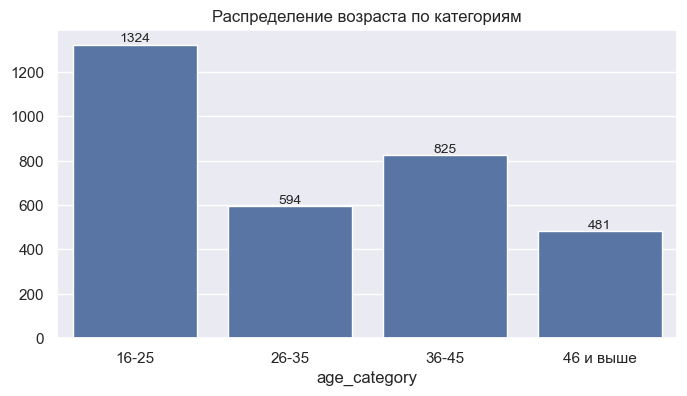

In [216]:
age_category = df_copy.age_category
# с учетом сортировки по наименованию категорий
ax = sns.barplot(x=age_category.value_counts().index, y=age_category.value_counts().values,
                order=sorted(df_copy.age_category.unique()))
ax.bar_label(ax.containers[0], fontsize=10)
plt.title('Распределение возраста по категориям')
plt.show()

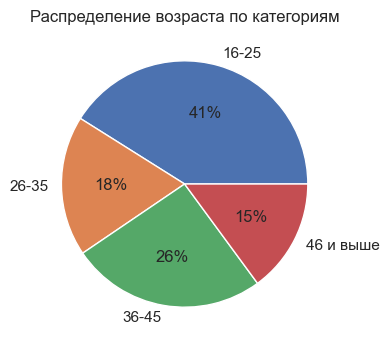

In [217]:
# с учетом сортировки по наименованию категорий
data_for_pie = age_category.value_counts().sort_index()
ax = plt.pie(x=data_for_pie, labels=data_for_pie.index, autopct='%.0f%%')
plt.title('Распределение возраста по категориям')
plt.show()

In [218]:
# дополнительно добавим расчет модального значения
df_copy.groupby('age_category')['age'].describe().join(
df_copy.groupby('age_category')['age'].agg([pd.Series.mode]))

,count,mean,std,min,25%,50%,75%,max,mode
age_category,,,,,,,,,
16-25,1324.0,21.773414,2.571432,17.0,20.0,22.0,24.0,25.0,25
26-35,594.0,30.385522,3.392462,26.0,27.0,30.0,34.0,35.0,35
36-45,825.0,38.659394,2.160796,36.0,37.0,39.0,40.0,45.0,36
46 и выше,481.0,46.954262,3.134816,46.0,46.0,46.0,46.0,65.0,46


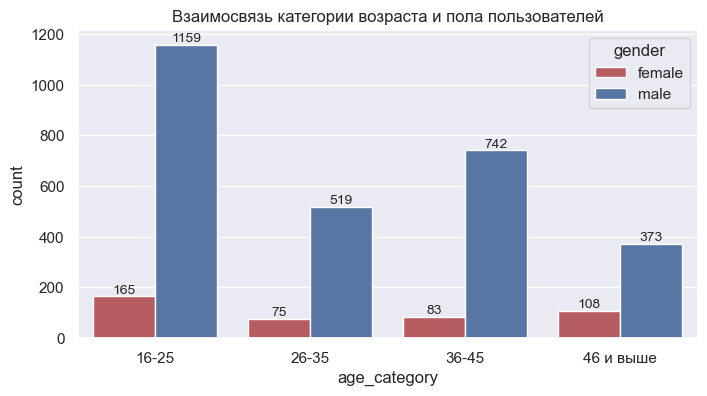

In [219]:
# с учетом сортировки по наименованию категорий
ax = sns.countplot(data=df_copy, x='age_category', hue='gender', palette=['r', 'b'],
                  order=sorted(df_copy.age_category.unique()))
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь категории возраста и пола пользователей')
plt.show()

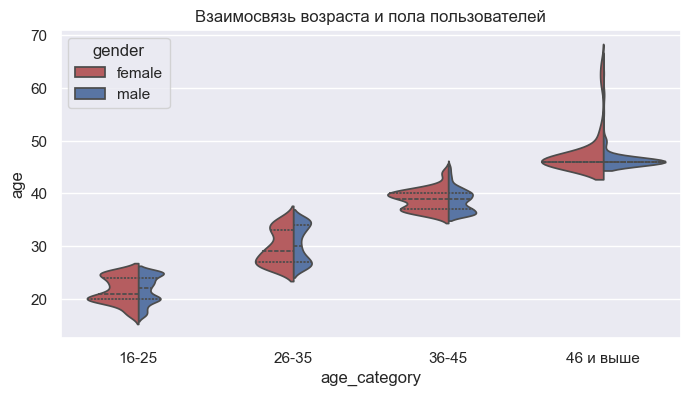

In [220]:
# скрипичная диаграмма
sns.violinplot(data=df_copy, x='age_category', y='age',
               hue='gender', split=True, inner="quart", palette=['r', 'b'],
               order=sorted(df_copy.age_category.unique()))
plt.title('Взаимосвязь возраста и пола пользователей')
plt.show()

In [221]:
# таблица сопряженности
WF=pd.crosstab(df_copy.age_category, df_copy.gender); WF

gender,female,male
age_category,,
16-25,165,1159
26-35,75,519
36-45,83,742
46 и выше,108,373


In [222]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [223]:
# Проверим связь возрастной категории и пола пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 43.29378682715017
degrees of freedom: 3
p-value: 2.1317257235166645e-09



In [224]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, в каждой возрастной категории распределение по полу различно.

***Шпаргалка по выводам:***
1. О возможной взаимосвязи признаков (присутствует или отсутствует на диаграммах, похожи ли распределения признаков).
2. Об особенностях распределения признака в разрезе основного признака (что характерно для каждого значения основного признака).
3. О значимости взаимосвязи признаков.

**Выводы:**
1. По итогу разделения пользователей по 4 группам возраста (16-25, 26-35, 36-45, 46 и выше), стало очевидно, что больше всего пользователей в категории 16-25 лет (44%), далее в категории 36-45 лет (33%), 26-35 лет (21%). В категории свыше 46 лет всего 2% пользователей (при дальнейшем анализе взаимосвязей при необходимости можно исключить данную категорию).
2. Медианные и средние значения возраста по категориям практически равны, однако модальные значения отличаются в большую сторону, соответственно: 21 и 24 года, 33 и 35 лет, 40 и 45 лет.
3. Количество мужчин намного больше, чем женщин. По столбчатым диаграммам взаимосвязь между признаками неочевидна, т.к. распределения похожи. Но по скрипичным диаграммам можно заметить некоторые отличия распределения возраста по полу.
4. Взаимосвязь пола и возраста пользователей является статистически значимой, т.е. в каждой возрастной категории распределение по полу различно.

### age_category - city

In [225]:
# выборка для городов, где проживает максимальное число пользователей из указавших город проживания
city = ['санкт-петербург', 'москва']
len(df_copy[df_copy.city.isin(city)])

1066

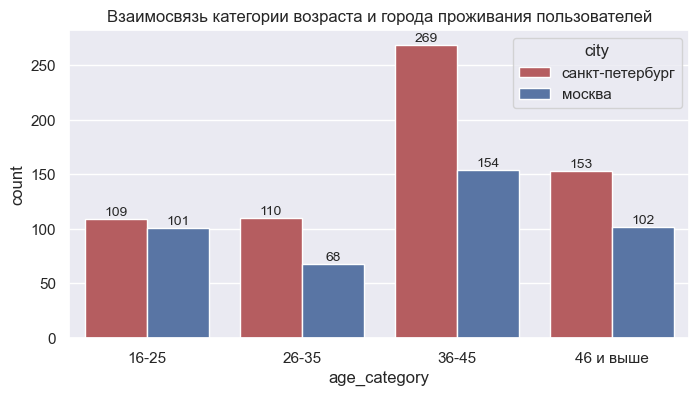

In [226]:
# с учетом сортировки по наименованию категорий
ax = sns.countplot(data=df_copy[df_copy.city.isin(city)], x='age_category', hue='city', palette=['r', 'b'],
                  order=sorted(df_copy.age_category.unique()))
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь категории возраста и города проживания пользователей')
plt.show()

In [227]:
df_copy[df_copy.city.isin(city)].groupby(['city', 'age_category'])['age'].describe().join(
df_copy[df_copy.city.isin(city)].groupby(['city', 'age_category'])['age'].agg([pd.Series.mode]))

count       mean       std   min    25%   50%  \
city            age_category                                                  
москва          16-25         101.0  21.693069  2.091615  17.0  20.00  21.0   
                26-35          68.0  32.088235  3.189232  26.0  29.75  33.0   
                36-45         154.0  38.227273  1.968785  36.0  37.00  38.0   
                46 и выше     102.0  46.441176  1.766428  46.0  46.00  46.0   
санкт-петербург 16-25         109.0  21.366972  2.016876  17.0  20.00  20.0   
                26-35         110.0  32.263636  2.923104  26.0  30.25  33.0   
                36-45         269.0  38.594796  2.209910  36.0  37.00  38.0   
                46 и выше     153.0  46.333333  1.601808  46.0  46.00  46.0   

                               75%   max  mode  
city            age_category                    
москва          16-25         24.0  25.0    20  
                26-35         35.0  35.0    35  
                36-45         40.0  44.0    36  
                46 и выше     46.0  60.0    46  
санкт-петербург 16-25         23.0  25.0    20  
                26-35         35.0  35.0    35  
                36-45         40.0  45.0    36  
                46 и выше     46.0  62.0    46

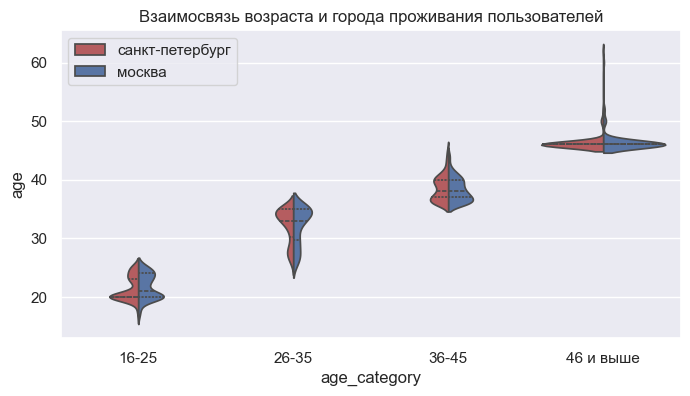

In [228]:
# скрипичная диаграмма
sns.violinplot(data=df_copy[df_copy.city.isin(city)], x='age_category', y='age',
               hue='city', split=True, inner="quart", palette=['r', 'b'],
               order=sorted(df_copy.age_category.unique()))
plt.legend(loc='upper left')
plt.title('Взаимосвязь возраста и города проживания пользователей')
plt.show()

In [229]:
# таблица сопряженности
WF=pd.crosstab(df_copy[df_copy.city.isin(city)].age_category, df_copy[df_copy.city.isin(city)].city); WF

city,москва,санкт-петербург
age_category,,
16-25,101,109
26-35,68,110
36-45,154,269
46 и выше,102,153


In [230]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [231]:
# Проверим связь возрастной категории и города проживания пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 8.251063585868305
degrees of freedom: 3
p-value: 0.0410981769630783



In [232]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, в каждой возрастной категории распределение по городу проживания различно.

**Выводы:**
1. Наибольшее число пользователей из указавших город проживает в Санкт-Петербурге и относится к категории 36-45 лет. Заметно ниже количество проживающих в Москве и имеющих ту же возрастную категорию пользователей.
2. Количество проживающих в Санкт-Петербурге больше, чем в Москве по всем категориям (кроме 46 и выше, где показатели равны). По столбчатым диаграммам взаимосвязь между признаками неочевидна, т.к. распределения похожи. Но по скрипичным диаграммам можно заметить некоторые отличия распределения возраста по городам.
3. Медианные, средние и модальные значения возраста по категориям с учетом распределения по городам совпадают не везде, что свидетельствует о перекосе распределений. Так и в Санкт-Петербурге, и в Москве в возрастной категории 36-45 лет среднее, медиана и мода составляют 41, 40 и 45 лет соответственно.
4. Взаимосвязь возраста и города проживания пользователей является статистически значимой, т.е. в каждой возрастной категории распределение по городу проживания различно.

### games - age_category

In [233]:
# добавим информацию о категориях в датасет df_games
df_games['age_category'] = df_games['age'].apply(age_to_category)
df_games.head()

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games,age_category
0,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,Dota 2,16-25
1,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,CS:GO,16-25
2,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,Warcraft III,16-25
3,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,League of Legends,36-45
4,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,Valorant,36-45


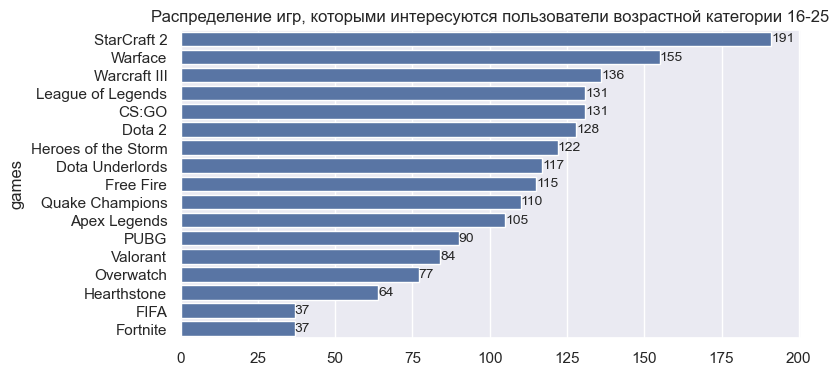

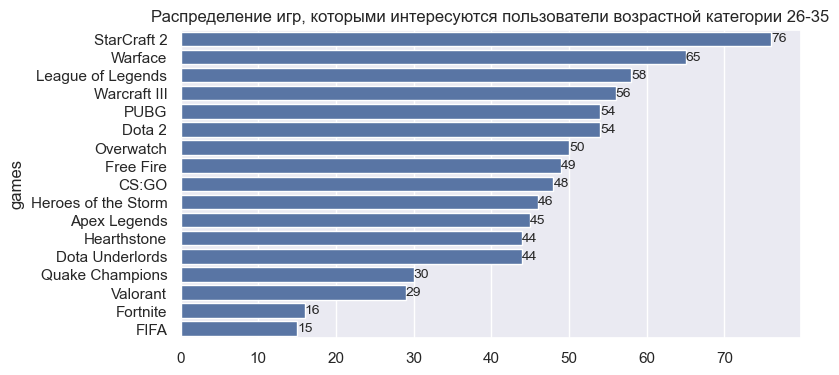

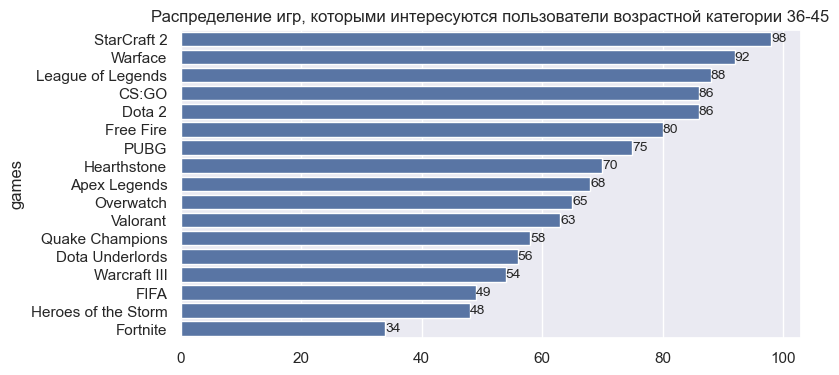

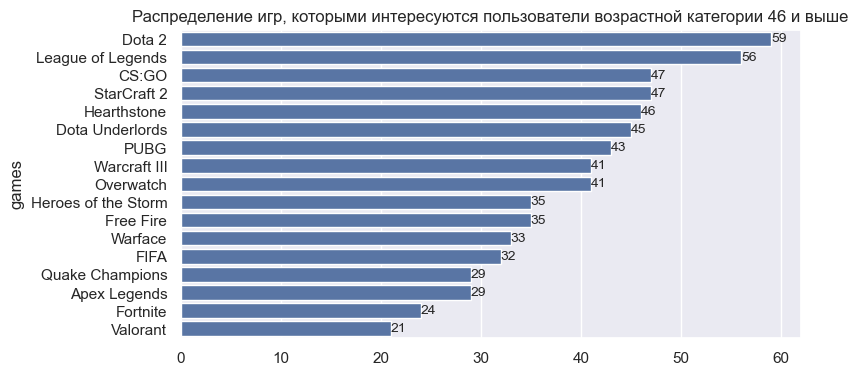

In [234]:
# поскольку игр достаточно много, целесообразно отрисовать диаграммы для каждой возрастной категории отдельно
for category in sorted(df_games.age_category.unique()):
    games = df_games[df_games.age_category==category]['games'].value_counts()
    ax = sns.barplot(y=games.index, x=games.values)
    ax.bar_label(ax.containers[0], fontsize=10)
    plt.title(f'Распределение игр, которыми интересуются пользователи возрастной категории {category}')
    plt.show()

In [235]:
# таблица сопряженности без учета возрастной категории 46 и выше (небольшие частоты)
WF=pd.crosstab(df_games[df_games.age_category!='46 и выше'].age_category,
               df_games[df_games.age_category!='46 и выше'].games); WF

games,Apex Legends,CS:GO,Dota 2,Dota Underlords,FIFA,Fortnite,Free Fire,Hearthstone,Heroes of the Storm,League of Legends,Overwatch,PUBG,Quake Champions,StarCraft 2,Valorant,Warcraft III,Warface
age_category,,,,,,,,,,,,,,,,,
16-25,105,131,128,117,37,37,115,64,122,131,77,90,110,191,84,136,155
26-35,45,48,54,44,15,16,49,44,46,58,50,54,30,76,29,56,65
36-45,68,86,86,56,49,34,80,70,48,88,65,75,58,98,63,54,92


In [236]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [237]:
# Проверим связь игр и возрастной категории пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 73.43937978156922
degrees of freedom: 32
p-value: 4.22592648364403e-05



In [238]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, игры, которыми интересуются пользователи, зависят от их возрастной категории.

**Выводы:**
1. Для каждой возрастной категории характерно свое распределение игр.
2. Топ-3 для каждой возрастной категории: 16-25 - StarCraft 2, Warface, Warcraft III; 26-35 - StarCraft 2, Warface, League of Legends; 36-45 - League of Legends, Dota 2, StarCraft 2. StarCraft 2 входит в топ-3 для всех возрастных категорий. Аутсайдерами являются Fortnite и FIFA.
3. Взаимосвязь игр, которыми интересуются пользователи, и их возрастной категории является статистически значимой, т.е. игры, которыми интересуются пользователи, зависят от их возрастной категории.
4. Рекомендуется рассмотреть возможность объединения игр в группы, например, по жанрам или производителю и дополнительно провести анализ в группах.

### games - gender

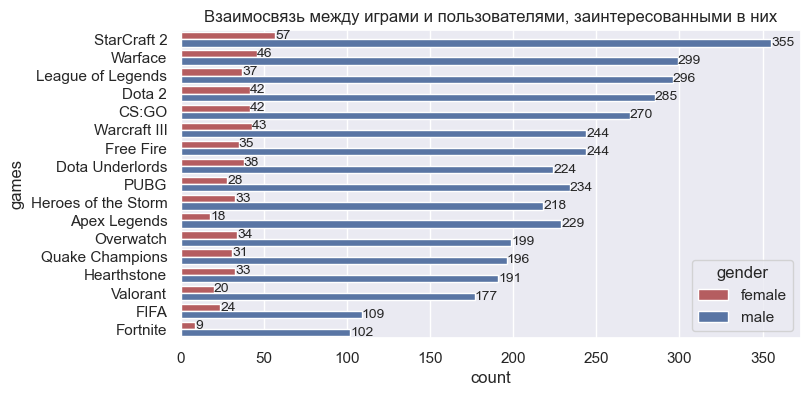

In [239]:
ax = sns.countplot(data=df_games, y='games', hue='gender', palette=['r', 'b'],
                  order=df_games.groupby('games')['gender'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь между играми и пользователями, заинтересованными в них')
plt.savefig("game_gender_corr.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

In [240]:
# таблица сопряженности
WF=pd.crosstab(df_games.gender, df_games.games); WF

games,Apex Legends,CS:GO,Dota 2,Dota Underlords,FIFA,Fortnite,Free Fire,Hearthstone,Heroes of the Storm,League of Legends,Overwatch,PUBG,Quake Champions,StarCraft 2,Valorant,Warcraft III,Warface
gender,,,,,,,,,,,,,,,,,
female,18,42,42,38,24,9,35,33,33,37,34,28,31,57,20,43,46
male,229,270,285,224,109,102,244,191,218,296,199,234,196,355,177,244,299


In [241]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [242]:
# Проверим связь игр и половой принадлежности пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 19.40779174546423
degrees of freedom: 16
p-value: 0.24808445821810904



In [243]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Данное отличие не является статистически значимым.
# Соответственно, игры, которыми интересуются пользователи, не зависят от их половой принадлежности.

**Выводы:**
1. Мужчин намного больше, чем женщин. Связь игр, которыми интересуются пользователи, с их половой принадлежностью визуально определить сложно.
2. Лидером как среди мужчин, так и среди женщин является игра StarCraft 2. На втором месте - Warface. Аутсайдером является Fortnite.
3. Взаимосвязь игр, которыми интересуются пользователи, и их половой принадлежности не является статистически значимой, т.е. игры, которыми интересуются пользователи, не зависят от их половой принадлежности.
4. Рекомендуется рассмотреть возможность объединения игр в группы, например, по жанрам или производителю и дополнительно провести анализ в группах.

### games - city

In [244]:
# выборка для городов, где проживает максимальное число пользователей из указавших город проживания
city = ['санкт-петербург', 'москва']
len(df_games[df_games.city.isin(city)])

1536

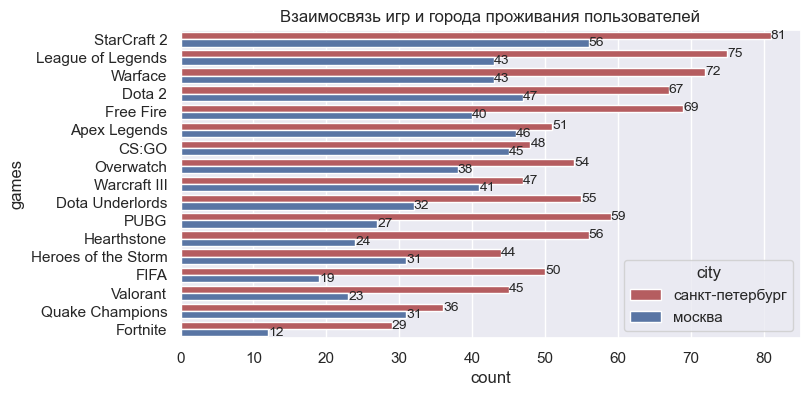

In [245]:
df = df_games[df_games.city.isin(city)]
ax = sns.countplot(data=df, y='games', hue='city', palette=['r', 'b'],
                  order=df.groupby('games')['city'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь игр и города проживания пользователей')
plt.show()

In [246]:
# таблица сопряженности
WF=pd.crosstab(df.city, df.games); WF

games,Apex Legends,CS:GO,Dota 2,Dota Underlords,FIFA,Fortnite,Free Fire,Hearthstone,Heroes of the Storm,League of Legends,Overwatch,PUBG,Quake Champions,StarCraft 2,Valorant,Warcraft III,Warface
city,,,,,,,,,,,,,,,,,
москва,46,45,47,32,19,12,40,24,31,43,38,27,31,56,23,41,43
санкт-петербург,51,48,67,55,50,29,69,56,44,75,54,59,36,81,45,47,72


In [247]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [248]:
# Проверим связь игр и города проживания пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 22.68246662950374
degrees of freedom: 16
p-value: 0.12249016311179095



In [249]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Данное отличие не является статистически значимым.
# Соответственно, игры, которыми интересуются пользователи, не зависят от их проживания
# в Санкт-Петербурге или Москве.

**Выводы:**
1. Санкт-Петербург лидирует по всем играм. Связь игр, которыми интересуются пользователи, с местом проживания визуально определить сложно.
2. Лидером как по Санкт-Петербургу, так и по Москве является игра StarCraft 2. На втором месте по Санкт-Петербургу - League of Legends, а по Москве - Dota 2. Аутсайдером в обеих категориях является Fortnite.
3. Взаимосвязь игр, которыми интересуются пользователи, и города их проживания не является статистически значимой, т.е. игры, которыми интересуются пользователи, не зависят от их проживания в Санкт-Петербурге или Москве.
4. Рекомендуется рассмотреть возможность объединения игр в группы, например, по жанрам или производителю и дополнительно провести анализ в группах.

### genres - age_category

***Распределение игр по жанрам:***
1. **Battle royale** (королевская битва): *Free Fire, PUBG, Apex Legends, Fortnite*
2. **CCG** (collectible card game, коллекционная карточная игра): *Hearthstone*
3. **FPS** (first-person shooter, шутер от первого лица): *CS:GO, Overwatch, Quake Champions, Valorant*
4. **MMOFPS** (massively multiplayer online first-person shooter, массовый многопользовательский шутер от первого лица): *Warface*
5. **MOBA** (multiplayer Online Battle Arena, многопользовательская онлайн боевая арена): *League of Legends, Dota 2, Heroes of the Storm*
6. **RTS** (real-time strategy, стратегия в реальном времени): *StarCraft 2, Warcraft III*
7. **TBS** (turn-based strategy, пошаговая стратегия): *Dota Underlords*
8. **Sports Simulation** (спортивный симулятор): *FIFA*

In [250]:
# добавление признака genres в датасет df_games
df_games['genres'] = pd.Series(dtype='object')
df_games.loc[df_games.games.isin(['Free Fire', 'PUBG', 'Apex Legends', 'Fortnite']), 'genres'] = 'Battle royale'
df_games.loc[df_games.games.isin(['Hearthstone']), 'genres'] = 'CCG'
df_games.loc[df_games.games.isin(['CS:GO', 'Overwatch', 'Quake Champions', 'Valorant']), 'genres'] = 'FPS'
df_games.loc[df_games.games.isin(['Warface']), 'genres'] = 'MMOFPS'
df_games.loc[df_games.games.isin(['League of Legends', 'Dota 2', 'Heroes of the Storm']), 'genres'] = 'MOBA'
df_games.loc[df_games.games.isin(['StarCraft 2', 'Warcraft III']), 'genres'] = 'RTS'
df_games.loc[df_games.games.isin(['Dota Underlords']), 'genres'] = 'TBS'
df_games.loc[df_games.games.isin(['FIFA']), 'genres'] = 'Sports Simulation'
df_games.head()

,id,age,gender,city,country,followers_count,last_seen,costs_to_rur,games,age_category,genres
0,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,Dota 2,16-25,MOBA
1,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,CS:GO,16-25,FPS
2,19,20,female,санкт-петербург,россия,39326,2022-09-03 20:36:02,25000.0,Warcraft III,16-25,RTS
3,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,League of Legends,36-45,MOBA
4,510,40,male,город не указан,россия,19698,2022-08-24 06:16:43,50000.0,Valorant,36-45,FPS


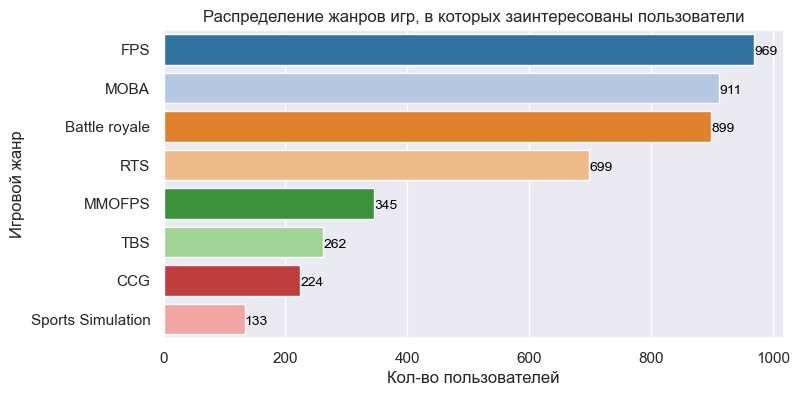

In [251]:
# установка единого цвета для каждого жанра
# Получаем частоты жанров и цвета
genres = df_games['genres'].value_counts()
labels = genres.index
colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))

# Строим график с использованием `hue`
g = sns.barplot(y=genres.index, x=genres.values, hue=genres.index, palette=colors, legend=False)

# Добавляем подписи значений на концах столбцов
for index, value in enumerate(genres.values):
    g.text(value + 0.5, index + .15, str(int(value)), color='black', fontsize=10)

# Оформление
plt.title('Распределение жанров игр, в которых заинтересованы пользователи')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Игровой жанр')

plt.show()

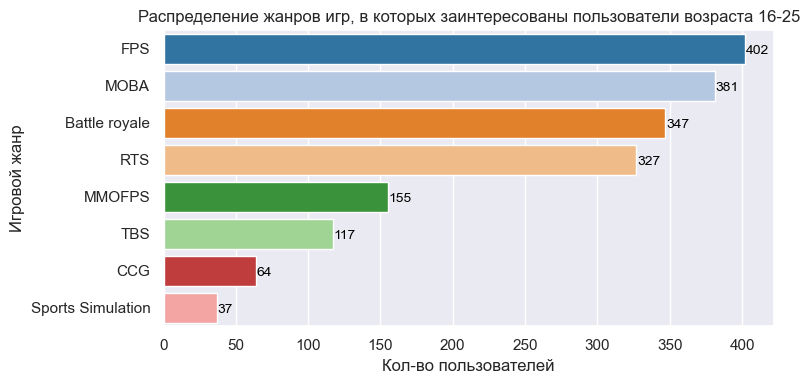

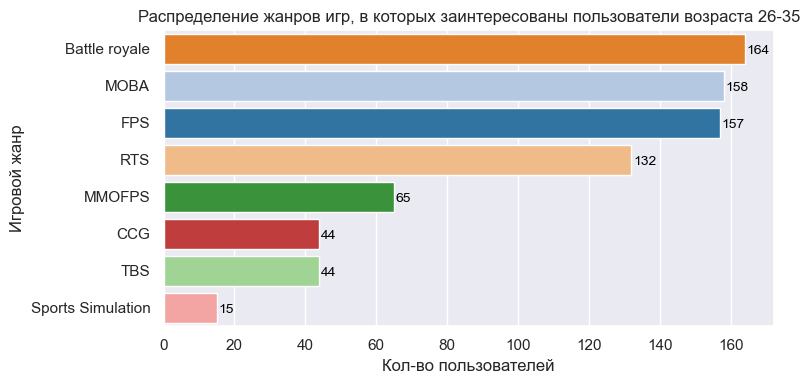

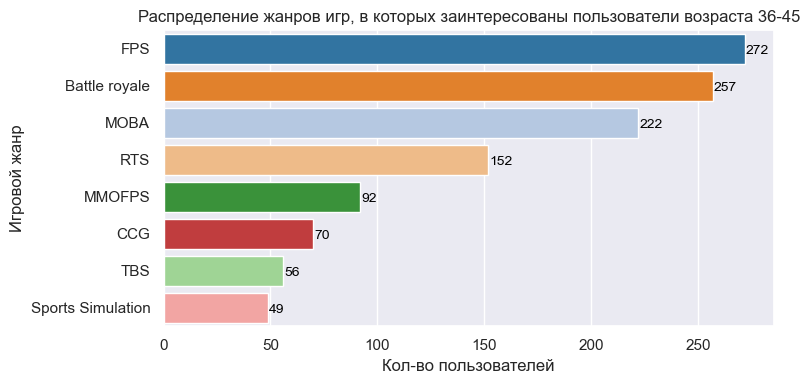

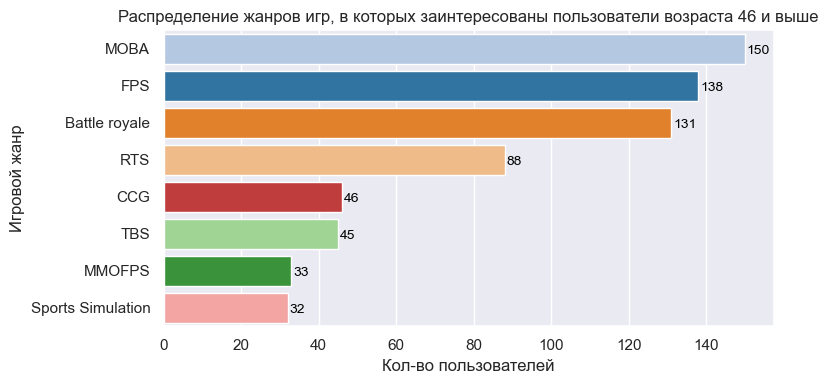

In [252]:
# поскольку игр достаточно много, целесообразно отрисовать диаграммы для каждой возрастной категории отдельно
# Допустим, colors уже определён ранее:
# colors = dict(zip(labels, plt.cm.tab20.colors[:len(labels)]))

for category in sorted(df_games.age_category.unique()):
    # Фильтруем данные по возрастной группе
    genres = df_games[df_games.age_category == category]['genres'].value_counts()
    
    # Получаем цвета в правильном порядке
    col = [colors[key] for key in genres.index]
    
    # Строим график с hue
    g = sns.barplot(
        y=genres.index,
        x=genres.values,
        hue=genres.index,   # добавляем hue
        palette=colors,     # используем тот же словарь цветов
        legend=False        # убираем легенду
    )
    
    # Добавляем подписи значений
    for index, value in enumerate(genres.values):
        g.text(value + 0.5, index + .15, str(int(value)), color='black', fontsize=10)

    # Оформление
    plt.title(f'Распределение жанров игр, в которых заинтересованы пользователи возраста {category}')
    plt.xlabel('Кол-во пользователей')
    plt.ylabel('Игровой жанр')
    plt.tight_layout()  # чтобы всё помещалось
    plt.savefig(f"city_distr_{category}.png", format = "png", dpi=500, bbox_inches='tight')
    plt.show()

In [253]:
# таблица сопряженности без учета возрастной категории 46 и выше (небольшие частоты)
WF=pd.crosstab(df_games[df_games.age_category!='46 и выше'].age_category,
               df_games[df_games.age_category!='46 и выше'].genres); WF

genres,Battle royale,CCG,FPS,MMOFPS,MOBA,RTS,Sports Simulation,TBS
age_category,,,,,,,,
16-25,347,64,402,155,381,327,37,117
26-35,164,44,157,65,158,132,15,44
36-45,257,70,272,92,222,152,49,56


In [254]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [255]:
# Проверим связь жанров игр и возрастной категории пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 46.87356420254535
degrees of freedom: 14
p-value: 2.0163863528244956e-05



In [256]:
# Поскольку полученное значение p-value < 0.05, то гипотеза Н0 отклоняется.
# Данное отличие является статистически значимым.
# Соответственно, жанры игр, которыми интересуются пользователи, зависят от их возрастной категории.

**Выводы:**
1. Топ-3 жанров игр, которыми интересуются пользователи: FPS, MOBA, Battle royale. Менее всего интересуются жанром Sports Simulation.
2. Для каждой возрастной категории характерно свое распределение жанров игр.
3. Топ-3 для каждой возрастной категории: 16-25 - FPS, MOBA, Battle royale; 26-35 - Battle royale, MOBA, FPS; 36-45 - FPS, Battle royale, MOBA. В топ-3 для всех категорий входят одни и те же жанры.
4. Взаимосвязь жанров игр, которыми интересуются пользователи, и их возрастной категории является статистически значимой, т.е. жанры игр, которыми интересуются пользователи, зависят от их возрастной категории.

### genres - gender

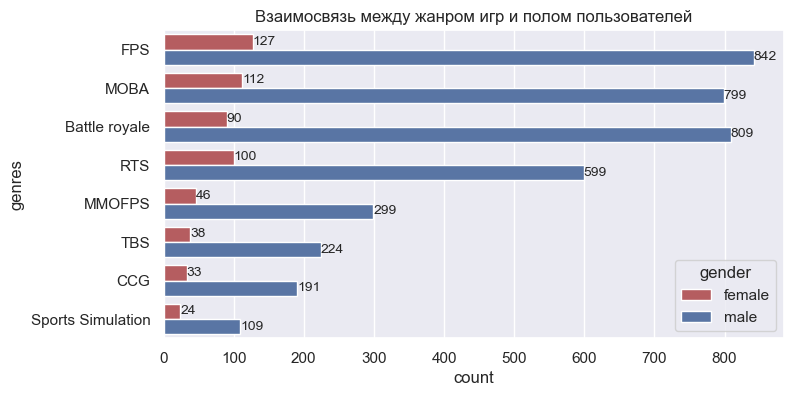

In [257]:
ax = sns.countplot(data=df_games, y='genres', hue='gender', palette=['r', 'b'],
                  order=df_games.groupby('genres')['gender'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь между жанром игр и полом пользователей')
plt.savefig("gender_genre_corr.png", format = "png", dpi=500, bbox_inches='tight')
plt.show()

In [258]:
# таблица сопряженности
WF=pd.crosstab(df_games.gender, df_games.genres); WF

genres,Battle royale,CCG,FPS,MMOFPS,MOBA,RTS,Sports Simulation,TBS
gender,,,,,,,,
female,90,33,127,46,112,100,24,38
male,809,191,842,299,799,599,109,224


In [259]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [260]:
# Проверим связь жанров игр и половой принадлежности пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 12.74094752129814
degrees of freedom: 7
p-value: 0.07867740542213919



In [261]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Данное отличие не является статистически значимым.
# Соответственно, жанры игр, которыми интересуются пользователи, не зависят от их половой принадлежности.

**Выводы:**
1. Мужчин намного больше, чем женщин. Связь жанров игр, которыми интересуются пользователи, с их половой принадлежностью визуально определить сложно.
2. Лидером как среди мужчин, так и среди женщин является жанр FPS. На втором месте: для мужчин - Battle royale, для женщин - MOBA. Менее всего обе категории интересуются жанром Sports Simulation.
3. Взаимосвязь жанров игр, которыми интересуются пользователи, и их половой принадлежности не является статистически значимой, т.е. жанры игр, которыми интересуются пользователи, не зависят от их половой принадлежности.

### games - city

In [262]:
# выборка для городов, где проживает максимальное число пользователей из указавших город проживания
city = ['санкт-петербург', 'москва']
len(df_games[df_games.city.isin(city)])

1536

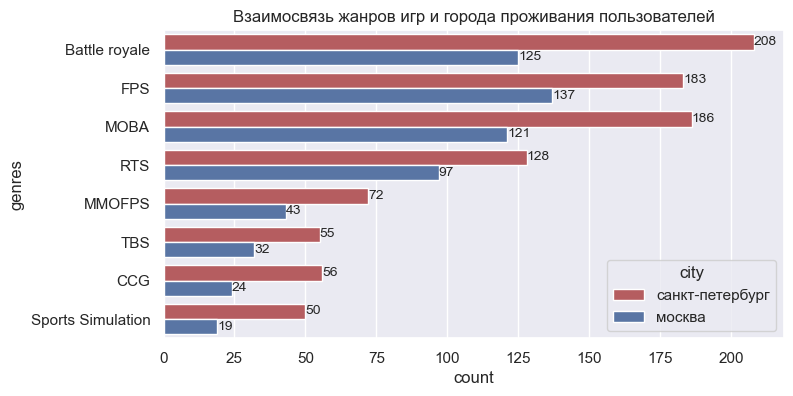

In [263]:
df = df_games[df_games.city.isin(city)]
ax = sns.countplot(data=df, y='genres', hue='city', palette=['r', 'b'],
                  order=df.groupby('genres')['city'].describe().sort_values(by='count', ascending=False).index)
ax.bar_label(ax.containers[0], fontsize=10)
ax.bar_label(ax.containers[1], fontsize=10)
plt.title('Взаимосвязь жанров игр и города проживания пользователей')
plt.show()

In [264]:
# таблица сопряженности
WF=pd.crosstab(df.city, df.genres); WF

genres,Battle royale,CCG,FPS,MMOFPS,MOBA,RTS,Sports Simulation,TBS
city,,,,,,,,
москва,125,24,137,43,121,97,19,32
санкт-петербург,208,56,183,72,186,128,50,55


In [265]:
# частоты в таблице сопряженности удовлетворяют условиям применения критерия хи-квадрат Пирсона (>5 в группе)
# (если менее 5 в группе, то рассчитываем по другому критерию, например, Фишера)

In [266]:
# Проверим связь жанров игр и города проживания пользователей с помощью критерия ХИ-квадрат.
# Гипотеза Н0: связь между признаками не является статистически значимой.
# Гипотеза H1: связь между признаками является статистически значимой.
# Уровень значимости полагаем равным 0,05.
chi2, prob, f, expected = scipy.stats.chi2_contingency(WF)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
print(output.format( chi2, f, prob))

test Statistics: 10.719360240712193
degrees of freedom: 7
p-value: 0.1513374805810524



In [267]:
# Поскольку полученное значение p-value > 0.05, то гипотеза Н0 принимается.
# Данное отличие не является статистически значимым.
# Соответственно, жанры игр, которыми интересуются пользователи, не зависят от их проживания
# в Санкт-Петербурге или Москве.

**Выводы:**
1. Санкт-Петербург лидирует по всем жанрам игра. Связь жанров игр, которыми интересуются пользователи, с местом проживания визуально определить сложно.
2. Лидером по Санкт-Петербургу является жанр Battle royale, а по Москве - FPS. Аутсайдером в обоих городах является Sports Simulation.
3. Взаимосвязь жанров игр, которыми интересуются пользователи, и города их проживания не является статистически значимой, т.е. жанры игр, которыми интересуются пользователи, не зависят от их проживания в Санкт-Петербурге или Москве.

# Общие выводы и рекомендации

***Шпаргалка:***
<br>Стоит собрать основные пункты из промежуточных выводов в итоговый вывод.
<br>При этом следует формулировать выводы так, чтобы они были понятны Заказчику и отвечали на его вопросы!

***Аналитические цели***:
1. изучить целевую аудиторию и составить портреты пользователей, увлекающихся киберспортом;
2. выявить факторы, влияющие на сумму затрат пользователей в онлайн-магазине.

**I. Общие выводы по датасету:**
1. Был представлен датасет с данными о профилях пользователей онлайн-магазина Заказчика, расположенного на платформе Вконтакте: файл в формате csv, содержащий 3525 строк (объектов) и 14 столбцов (признаков).
2. Предобработка данных включала в себя: исключение нерелевантных признаков и объектов, дубликатов, распаковку и форматирование данных, расчет дополнительных признаков.
3. По итогу предобработки сохранено два датасета для последующего анализа:
* в разрезе уникальных профилей пользователей (3224 объекта, 9 признаков, файл в формате .xlsx);
* в разрезе значений игр (4442 объекта, 9 признаков, файл в формате .csv).
4. Дополнительно в процессе анализа была произведена группировка значений возраста по 4 категориям, а также группировка игр по 8 жанрам.
5. В анализе использовалась выборка пользователей, которые осуществляли вход в онлайн-магазин с начала 2022г.

**II. Целевая аудитория и портреты пользователей, увлекающихся киберспортом**
1. ***Возраст и половая принадлежность:***
* разброс от 16 до 64 лет.
* возраст 75% пользователей - 38 лет, что свидетельствует о том, что большее число пользователей (фанатов киберспорта) - в основном, молодежь (по российским стандартам).
* в диапазоне примерно после 27 лет и до 33 лет возраст "проседает", несмотря на то, что средние значения по всей выборке составляют 29-30 лет.
* большая часть пользователей (фанатов киберспорта) - мужчины (86,6%).
* медианное значение возраста мужчин составляет 29 лет, а женщин 30 лет.
* по итогу разделения пользователей по 4 группам возраста, стало очевидно, что больше всего пользователей в категории 16-25 лет (44%), далее в категории 36-45 лет (33%), 26-35 лет (21%). В категории свыше 46 лет всего 2% пользователей.
* средние и наиболее часто встречаемые значения в каждой возрастной категории соответственно: 21 и 24 года, 33 и 35 лет, 40 и 45 лет.
* возраст пользователей, увлекающихся киберспортом, отличается в зависимости от половой принадлежности (как при анализе по годам, так и по возрастным категориям).
2. **Место проживания:**
* 95% пользователей проживают в России.
* у почти половины пользователей город не указан (примерно 46%).
* среди пользователей, указавших город проживания, большинство проживают в Санкт-Петербурге (641 чел.), на втором месте - Москва (425 чел.). В остальных городах проживает сравнительно меньше пользователей онлайн-магазина (преимущественно, в городах-миллионниках).
* медианные значения возраста пользователей, проживающих в Москве и Санкт-Петербурге, совпадают и составляют 36 лет. Однако отмечено, что возраст женщин, проживающих в Москве, в среднем выше, чем возраст женщин, проживающих в Санкт-Петербурге, а также мужчин, проживающих в обоих городах, и составляет 39 лет по сравнению с 35-36 годами по другим категориям.
* наибольшее число из указавших город пользователей проживает в Санкт-Петербурге и относится к категории 36-45 лет. Заметно ниже количество проживающих в Москве и имеющих ту же возрастную категорию пользователей.
* количество проживающих в Санкт-Петербурге больше, чем в Москве по всем категориям (кроме 46 и выше, где показатели равны).
* и в Санкт-Петербурге, и в Москве в возрастной категории 36-45 лет средний и наиболее часто встречаемый возраст составляет 40 и 45 лет соответственно.
* в каждой возрастной категории распределение по выбранным городам проживания различно; однако при рассмотрении взаимосвязи по годам, такая связь не подтверждается.
3. **Количество подписчиков:**
* у некоторых пользователей подписчики отсутствуют, а максимальное число подписчиков составляет 140969 человек. Примерно у 24% аккаунтов отсутствует информация о наличии подписчиков (возможно, закрытые аккаунты).
* среднее число подписчиков пользователей составляет примерно 677 человек, а медианное - 16 человек, что указывает на наличие небольшого числа пользователей с большим числом подписчиков - возможно, это лидеры мнений или блогеры.
* число подписчиков у 75% пользователей - 276 человек, что свидетельствует о том, что у большинства пользователей сравнительно немного подписчиков.
4. **Игры:**
* количество уникальных игр, которыми интересуются пользователи, составляет 17.
* наиболее популярной игрой является StarCraft 2, ей интересуются 412 пользователей.
* в топ-5 также входят Warface, League of Legends, Dota 2 и CS:GO.
* наименее популярными являются Fortnite и FIFA, ими интересуется всего 111 и 133 человека соответственно.
* медианные значения возраста пользователей в зависимости от игр, которыми они интересуются, составляют от 25 до 36 лет.
* для каждой возрастной категории характерно свое распределение игр.
* топ-3 для каждой возрастной категории: 16-25 - StarCraft 2, Warface, Warcraft III; 26-35 - StarCraft 2, Warface, League of Legends; 36-45 - League of Legends, Dota 2, StarCraft 2. StarCraft 2 входит в топ-3 для всех возрастных категорий. Аутсайдерами являются Fortnite и FIFA.
* одними играми интересуются более молодые пользователями, другими - более зрелые (как при анализе по годам, так и по возрастным категориям).
* лидером как среди мужчин, так и среди женщин является игра StarCraft 2. На втором месте - Warface. Аутсайдером является Fortnite.
* игры, которыми интересуются пользователи, не зависят от их половой принадлежности.
* Санкт-Петербург лидирует по всем играм.
* лидером как по Санкт-Петербургу, так и по Москве является игра StarCraft 2. На втором месте по Санкт-Петербургу - League of Legends, а по Москве - Dota 2. Аутсайдером в обеих категориях является Fortnite.
* игры, которыми интересуются пользователи, не зависят от их проживания в Санкт-Петербурге или Москве.
5. **Жанры игр:**
* топ-3 жанров игр, которыми интересуются пользователи: FPS, MOBA, Battle royale. Менее всего интересуются жанром Sports Simulation.
* для каждой возрастной категории характерно свое распределение жанров игр.
* топ-3 для каждой возрастной категории: 16-25 - FPS, MOBA, Battle royale; 26-35 - Battle royale, MOBA, FPS; 36-45 - FPS, Battle royale, MOBA. В топ-3 для всех категорий входят одни и те же жанры.
* жанры игр, которыми интересуются пользователи, зависят от их возрастной категории.
* лидером как среди мужчин, так и среди женщин является жанр FPS. На втором месте: для мужчин - Battle royale, для женщин - MOBA. Менее всего обе категории интересуются жанром Sports Simulation.
* жанры игр, которыми интересуются пользователи, не зависят от их половой принадлежности.
* Санкт-Петербург лидирует по всем жанрам игр.
* лидером по Санкт-Петербургу является жанр Battle royale, а по Москве - FPS. Аутсайдером в обоих городах является Sports Simulation.
* жанры игр, которыми интересуются пользователи, не зависят от их проживания в Санкт-Петербурге или Москве.
6. **Портрет основного пользователя онлайн-магазина:**
* Мужчина
* в возрасте 21-24 или 40-45 лет,
* проживающий в России (вероятнее всего, в Санкт-Петербурге по данным из выборки пользователей, указавших город проживания),
* имеющий небольшое количество подписчиков,
* являющийся фанатом игры StarCraft2 (RTS - real-time strategy)
* либо в целом жанра FPS (first-person shooter).

**III. Факторы, влияющие на сумму затрат пользователей, в онлайн-магазине**
1. **Сумма затрат в онлайн-магазине:**
* минимальная сумма затрат пользователей - 19500 руб., максимальная - 312100 руб.
* средняя сумма затрат пользователей составляет примерно 30571 руб., а медианная - 25000 руб.
* процентили с 10-го по 90-й равны и составляют 25000 руб., что свидетельствует о странности распределения признака. Возможно, сумма затрат могла быть связана с единоразовыми покупками одних и тех же товаров, например, в период распродажи или акций.
2. **Влияние факторов:**
* линейная связь между возрастом и затратами пользователей не обнаружена.
* сумма затрат пользователей не зависит от половой принадлежности.
* в целом сумма затрат пользователей, увлекающихся киберспортом, не отличается в зависимости от проживания в Москве или Санкт-Петербурге.

**IV. Рекомендации:**
1. В связи с обнаруженными "полными" дубликатами и аномальными записями провести дополнительную проверку исходных данных и методов их сбора. А также собрать информацию о проведенных акционных мероприятиях в онлайн-магазине, которые могли стать причиной "нестандартного" распределения суммы затрат пользователей.
2. Дополнительно собрать данные о затратах пользователей в разрезе онлайн-игр с целью выявления наиболее прибыльных сегментов.
3. Дополнительно проанализировать выборку пользователей с большими затратами. Возможно, удастся выявить причины, влияющие на лояльность пользователей и на объем их затрат в онлайн-магазине.
4. Дополнительно проанализировать пользователей с большим числом подписчиков. Возможно, это лидеры мнений или блогеры, которые впоследствии могут быть полезны Заказчику.
5. Провести дополнительный анализ в возрастных категориях, а также по играм и жанрам игр в целом. Составить портреты пользователей в разрезе разных характеристик.
6. При планировании запуска таргетированной рекламы руководствоваться половозрастными характеристиками пользователей. Выбирать пользователей из России. Для поддержания лояльности, в первую очередь, настраивать рекламу для пользователей из Санкт-Петербурга и Москвы; а для привлечения новых пользователей, возможно, обратить внимание на пользователей из регионов, преимущественно из городов-миллионников.